# Прогноз на следующий год

## Запрос бизнеса
**Выявить определяющие успешность игры закономерности.**  
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**примечание**  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Инструкция по выполнению проекта
#### Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv.  
#### Шаг 2. Подготовьте данные
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.  
#### Шаг 3. Проведите исследовательский анализ данных
* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?  
#### Шаг 4. Составьте портрет пользователя каждого региона
* Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?  
#### Шаг 5. Проверьте гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Задайте самостоятельно пороговое значение alpha.  
##### Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.  
#### Шаг 6. Напишите общий вывод

#### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

## Знакомство с данными и подготовка данных

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# importing a library for operating with a data type "NaN"
import numpy as np
from scipy import stats as st

# отключаем некритичные уведомления
import warnings
warnings.filterwarnings('ignore')
# показывать до 40ка колонок
pd.set_option('display.max.columns', 40)
# установка формата вывода на дисплей численных значений
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
try:
    # Yandex path
    games = pd.read_csv('/dat...s.csv')
except:
    # web patch
    games =  pd.read_csv('https://eddydewrussia.ru...c311d01646465020')

In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### переводим названия колонок в змеиный формат

In [5]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### коротко о данных

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


* таблица в целом - проверить дубликаты
* name - проверить на неявные дубликаты
* platform - проверить на неявные дубликаты
* year_of_release 
* * перевести в формат **Int64**
* * найти, если возможно, во внешний источниках год релиза для строк с пропусками
* genre - проверить на неявные дубликаты
* user_score - перевести в численный формат **float64**
* rating - проверить на неявные дубликаты

#### таблица в целом - проверить дубликаты

In [8]:
games.duplicated().sum()

0

явных дубликатов в таблице **нет**

#### name - проверить на неявные дубликаты

Две строки с пропусками.  
Найдём их и посмотрим.

In [9]:
games[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**мы поймали** таракашек!  
Это строки  
* 659
* 14244
Без названия игры нет смысла рассматривать данные, к тому же количество пропущенных значений ничтожно мало (2 / 16715).  
**удаляем эти две строки**

In [10]:
games = games.drop(index=[659, 14244])
games.reset_index()
games[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [11]:
games.name.describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

Задача успешно решена и заодно узнали самый часто упоминаемый тайтл:  
**Need for Speed: Most Wanted**

Итак. Проверяем на неявные дубликаты.

In [ ]:
sorted(games['name'].unique())

Принт удалён из-за большого объёма

Вывод 

Никогда не думал, что их такое огромное количество  
Посмотрим на самые повторяющиеся названия

In [13]:
games['name'].value_counts().head(10)

Need for Speed: Most Wanted     12
Ratatouille                      9
LEGO Marvel Super Heroes         9
FIFA 14                          9
Madden NFL 07                    9
LEGO The Hobbit                  8
FIFA Soccer 13                   8
Terraria                         8
LEGO Harry Potter: Years 5-7     8
Monopoly                         8
Name: name, dtype: int64

##### Неявные дубликаты в колонке **name**


1. Большое количество уникальных значений **11559**  
это 11559 / 16713 = 70% от всех записей.  
2. Лидеры упоминаний всего лишь с количеством строк 12 - 8  
3. Просматривать весь список на выявление неявных дубликатов - **нереально**  
4. Просмотр первого километра записей **не выявил** неявных дубликатов.  
**Принимаем на веру то, что неявных дубликатов в колонке нет или несущественно мало и они не внесут искажения в исследование**


#### platform проверить на неявные дубликаты

In [14]:
games.platform.describe()

count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

In [ ]:
sorted(games['platform'].unique())

Принт удалён из-за большого объёма

##### Неявные дубликаты в platform **отсутствуют**

#### year_of_release
* перевести в формат даты Int64
* найти, если возможно, во внешний источниках год релиза для строк с пропусками

In [16]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


Тип данных 'year_of_release' изменён.

Посмотрим, какие значения встречаются

In [18]:
games['year_of_release'].sort_values().unique()

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, <NA>]
Length: 38, dtype: Int64

Богатая история игровой индустрии.  
Пожалуй, сначала попробуем разобраться с NaN

In [19]:
print("В колонке year_of_release", 16713-16444, 'пропусков значений')

В колонке year_of_release 269 пропусков значений


269 строк - это много для заполнения года релиза вручную из открытых источников. 
Что с этим делать решим **позже**

По рекомендации старшего товарища (спасибо, Максим), оставляю пропуски без заполнения.

#### genre - проверить на неявные дубликаты

In [20]:
games.genre.describe()

count      16713
unique        12
top       Action
freq        3369
Name: genre, dtype: object

In [21]:
sorted(games['genre'].unique())

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

**без неявных дубликатов**

#### user_score - перевести в численный формат float64

In [22]:
games.user_score.describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

**tbd** часто встречающееся значение  
оно означает, что **рейтинг на определён**  
**заменим на NaN**

In [23]:
games['user_score'].replace("tbd", np.NaN, inplace = True)

In [24]:
games['user_score'] = pd.to_numeric(games['user_score'])

In [25]:
games.user_score.describe()

count   7,590.00
mean        7.13
std         1.50
min         0.00
25%         6.40
50%         7.50
75%         8.20
max         9.70
Name: user_score, dtype: float64

**Пропусков** (16713 - 7590) = 9123 строк.  
Достаточно много.  
Столько пропусков нечем заменять.

#### **rating** - проверить на неявные дубликаты

In [26]:
games.rating.describe()

count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

In [27]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

**неявных дубликатов** нет  
есть много пропусков значений  
Для анализа использовать **только 4 рейтинга**  
* E
* T
* M
* E10+

Если **пропуски** значений будут мешать анализу, их **можно будет заменить** на "Emty"

### Закончили знакомство с данными и исправление недостатков

### Вывод по предподготовке данных  
1. Названия колонок переведены в змеиный формат  
2. В данных отсутствуют строки-дубликаты  
3. Удалили две строки с пропусками в названии игры  
4. Принимаем на веру то, что в колонке названий игр неявных дубликатов нет или несущественно мало и они не внесут искажения в исследование  
5. Неявные дубликаты в platform отсутствуют  
6. year_of_release перевдён в целочисленный формат. есть пропуски в данных. Оставлено без заполнения.  
7. genre без дубликатов  
8. user_score переведен в численный формат, символьные значения "tbd" заменены на значение пропуска NaN  
9. пропуски в user_score оставлены как есть  
10. rating - нет дубликатов, есть много пропусков (оставлено как есть)  

## Суммарные продажи

In [28]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,"16,444.00","16,713.00","16,713.00","16,713.00","16,713.00","8,137.00","7,590.00"
mean,"2,006.49",0.26,0.15,0.08,0.05,68.97,7.13
std,5.88,0.81,0.50,0.31,0.19,13.94,1.50
min,"1,980.00",0.00,0.00,0.00,0.00,13.00,0.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00,6.40
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00,7.50
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00,8.20
max,"2,016.00",41.36,28.96,10.22,10.57,98.00,9.70


Добавим в таблицу колонку **all_sales** с продажами во всех регионах для каждой строки.  
all_sales = na_sales + eu_sales + jp_sales + other_sales

In [29]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [30]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,"16,444.00","16,713.00","16,713.00","16,713.00","16,713.00","8,137.00","7,590.00","16,713.00"
mean,"2,006.49",0.26,0.15,0.08,0.05,68.97,7.13,0.53
std,5.88,0.81,0.50,0.31,0.19,13.94,1.50,1.55
min,"1,980.00",0.00,0.00,0.00,0.00,13.00,0.00,0.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00,6.40,0.06
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00,7.50,0.17
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00,8.20,0.47
max,"2,016.00",41.36,28.96,10.22,10.57,98.00,9.70,82.54


## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы.  
Важны ли данные за все периоды?

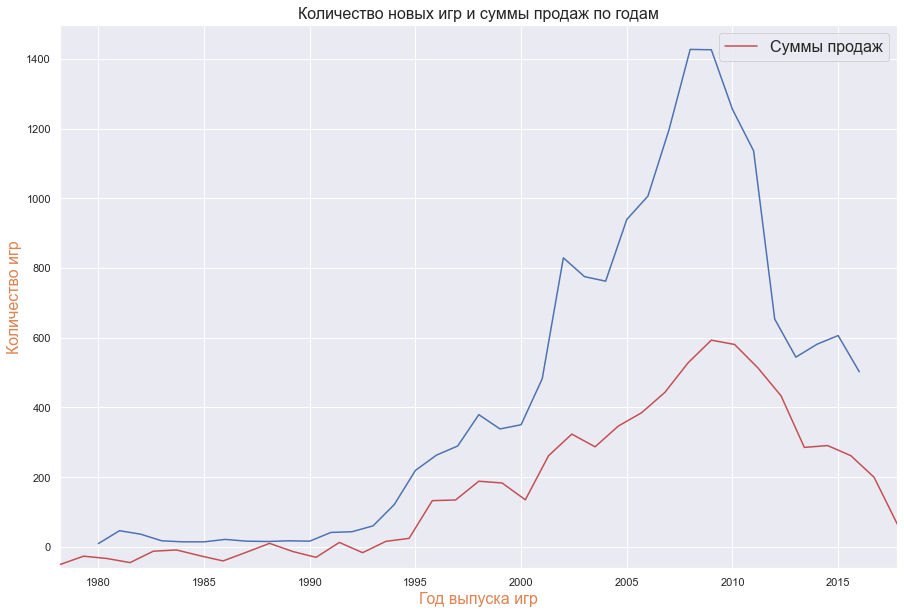

In [31]:
# setup size plot
sns.set(rc = {'figure.figsize':(15,10)})
fig=plt.figure()

ax=fig.add_subplot(111, label="1")
ax3=fig.add_subplot(111, frame_on=False, alpha=0.7)
# plot qty_games_per_year
ax.plot(games.groupby(by='year_of_release')['name'].count(), color="C0", label="Games")
ax.set_xlabel("Год выпуска игр", color="C1",  fontsize=16)
ax.set_ylabel("Количество игр", color="C1",  fontsize=16)

# plot qty_sales_per_year
ax3.plot(games.groupby(by='year_of_release')['all_sales'].sum(), color="C3", label="Суммы продаж")
ax3.axis('off')

plt.title("Количество новых игр и суммы продаж по годам",  fontsize=16);
plt.legend(  fontsize=16)
plt.ylim(0, 1600)
plt.xlim(1980, 2016)
plt.show()

### Годы для исследования
* Данные за **2016** год явно неполные.  
* После пика в 2010 году последовало снижение к по всем показателям и в 2015 году сформировалась ступенечка  
* Ранее **1995** года информации крайне мало.  
* Ступенечка, зеркальная ступенечке 2015 года, была с **1996 по 2000** года.
* * **Данные ранее 1996 года можно считать неинтересными для исследования**
* * **2016** также не подходит для исследования из-за неполноты данных  
  
  
**1996 - 2015** интересный интервал  
Но в целях прогнозирования это слишком большой период  
  
**2014 - 2015** - интервал для прогнозирования

### Как менялись продажи по платформам

#### платформы с наибольшими суммарными продажами

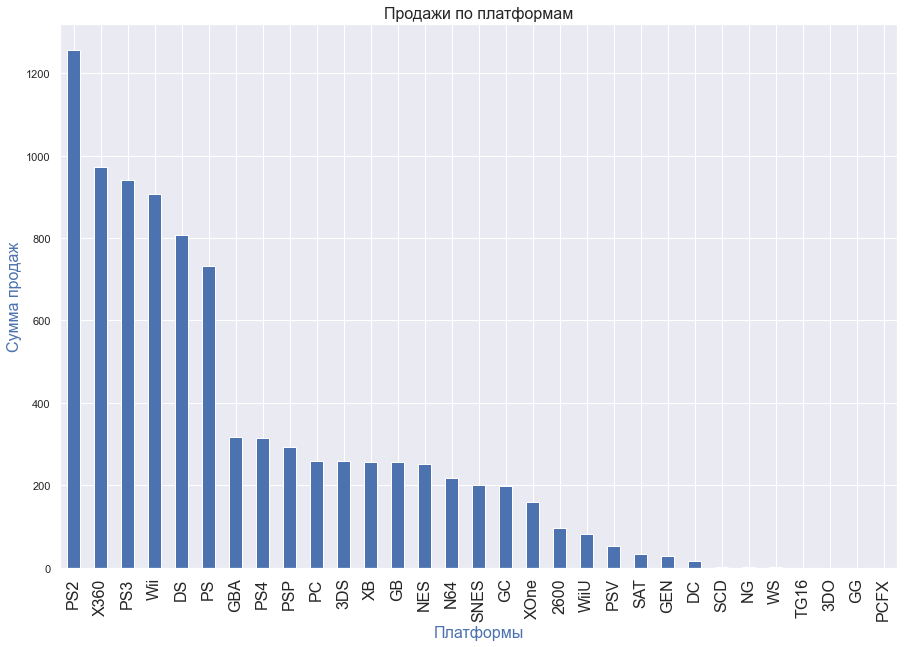

In [32]:
games.groupby(by='platform')['all_sales'].sum().sort_values(ascending = False).plot(kind='bar');
plt.xlabel("Платформы", color="C0",  fontsize=16);
plt.ylabel("Сумма продаж", color="C0",  fontsize=16);

plt.title("Продажи по платформам",  fontsize=16);
plt.xticks(rotation = 90, fontsize=16);

In [33]:
all_sales_games_per_platform = games.groupby(by='platform')['all_sales'].sum().sort_values(ascending = False)

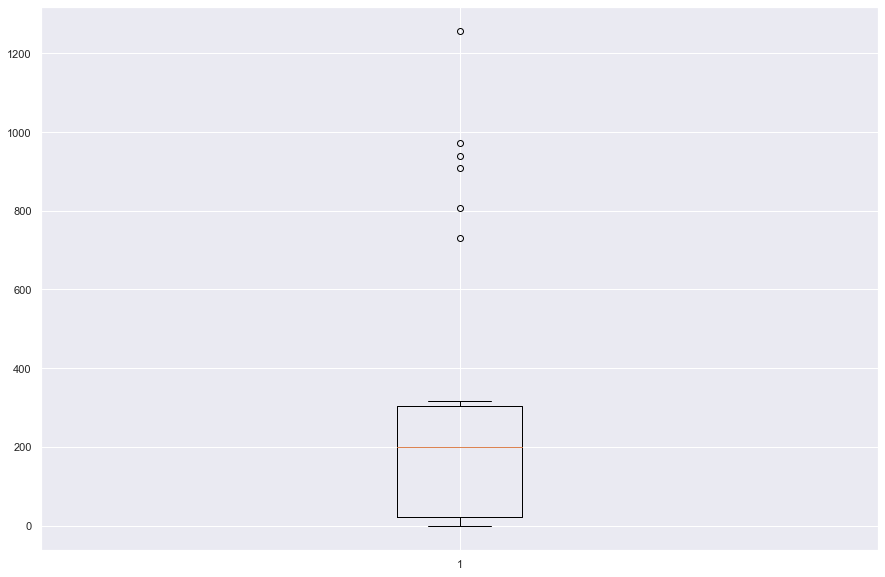

In [34]:
plt.boxplot(all_sales_games_per_platform);

Получается **две** группы платформ по продажам
* экстремально высокие продажи - **более 600 млн**
* медианные и более продажи - **200 и более млн**

##### более 600 млн

In [35]:
sales_up_600 = all_sales_games_per_platform[all_sales_games_per_platform > 600].sort_values(ascending = False)

In [36]:
sales_up_600

platform
PS2    1,255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: all_sales, dtype: float64

##### 200 и более млн

In [37]:
sales_up_200 = all_sales_games_per_platform[all_sales_games_per_platform >= 200].sort_values(ascending = False)

In [38]:
sales_up_200

platform
PS2    1,255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
Name: all_sales, dtype: float64

#### За какой характерный срок появляются новые и исчезают старые платформы?

Построим графики всех продаж по каждой платформе **по годам**.   

Для постоения графика берём выборку **sales_up_600** 

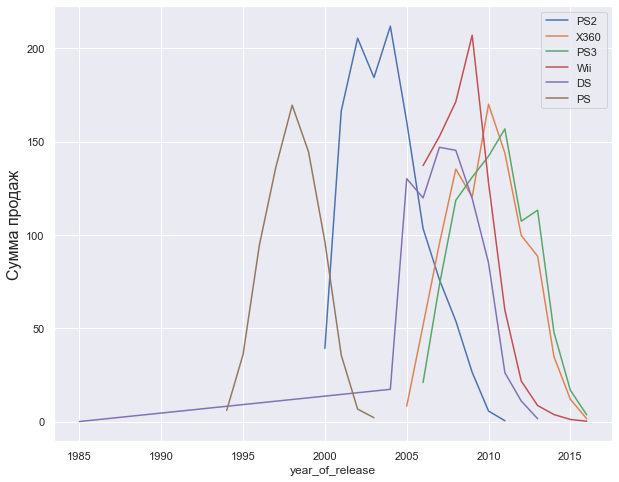

In [39]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 14})

# для каждого уникального названия платформы из sales_up_600
for p in sales_up_600.index:
    # простроить график продаж по годам
    # но только для тех лет, когда сумма больше "0"
    for_plot = games.query('platform == @p and all_sales > 0')
    for_plot = for_plot.groupby(['year_of_release'])['all_sales'].sum()
    # plot
    ax = for_plot.plot(label=p, legend=True);
    
#    plt.legend(fontsize=16)
#    plt.title(p,  fontsize=16)
    plt.ylabel("Сумма продаж", fontsize=16)

Посчитаем **время жизни** платформ

In [40]:
# объявим массив данных по продолжительности жизни платформ
platform_lifetime =   pd.DataFrame(columns=['platform', 'first_year', 'lifetime'])

# для каждого уникального названия платформы из основной таблицы
for p in sorted(games['platform'].unique()):
    # но только для тех лет, когда сумма больше "0"
    for_lifetime = games.query('platform == @p and all_sales > 0')
    # первый год жизни платформы 
    first_year = for_lifetime['year_of_release'].min()
    # датафрейм в виде списка с годами жизни 
    for_lifetime = for_lifetime.groupby(['year_of_release'])['year_of_release'].count() #.reset_index(drop=True)
    # время жизни 
    life_time = len(for_lifetime)
    # добавим данные в массив
    str = {'platform':p,'lifetime':life_time, 'first_year':first_year}
    platform_lifetime = platform_lifetime.append(str, ignore_index=True)
# отсортируем platform_lifetime по году появления
platform_lifetime =  platform_lifetime.sort_values(by='first_year')
print('Сроки жизни платформ')    
print(platform_lifetime)

Сроки жизни платформ
   platform first_year lifetime
0      2600       1980       10
11      NES       1983       12
4        DS       1985       11
13       PC       1985       26
5        GB       1988       13
23     SNES       1990       10
8       GEN       1990        5
9        GG       1992        1
22      SCD       1993        2
12       NG       1993        4
21      SAT       1994        6
15       PS       1994       10
1       3DO       1994        2
24     TG16       1995        1
14     PCFX       1996        1
10      N64       1996        7
3        DC       1998        7
25       WS       1999        3
6       GBA       2000        8
29       XB       2000        9
16      PS2       2000       12
7        GC       2001        7
19      PSP       2004       12
28     X360       2005       12
17      PS3       2006       11
26      Wii       2006       11
2       3DS       2011        6
20      PSV       2011        6
27     WiiU       2012        5
18      PS4       2

In [41]:
platform_lifetime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   platform    31 non-null     object
 1   first_year  31 non-null     object
 2   lifetime    31 non-null     object
dtypes: object(3)
memory usage: 992.0+ bytes


**lifetime** конвертировать в 'int'

In [42]:
platform_lifetime = platform_lifetime.astype({'first_year':np.int64, 'lifetime': np.int64})

In [43]:
platform_lifetime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   platform    31 non-null     object
 1   first_year  31 non-null     int64 
 2   lifetime    31 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 992.0+ bytes


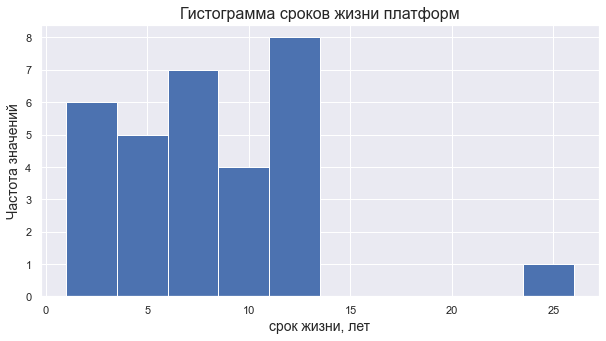

In [44]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,5)})
plt.rcParams.update({'font.size': 14})

platform_lifetime.lifetime.hist(bins=10);

plt.ylabel("Частота значений",  fontsize=14);
plt.title("Гистограмма сроков жизни платформ",  fontsize=16);
plt.xlabel("срок жизни, лет",  fontsize=14);

Уникальный рекордсмен - **РС**  
Однако, **нельзя считать однородной** эту пратформу.  
В платформе **РС** есть большое число поколений центральных процессоров и графических ускорителей.  
Поэтому для того, чтобы эту платформу полноценно включить в исследование, необходимо её **дробить на группы**  
Такой возможности у нас нет, поэтому в вопросах, связанных со сроками жизни платформ, данные по **РС исключаем**

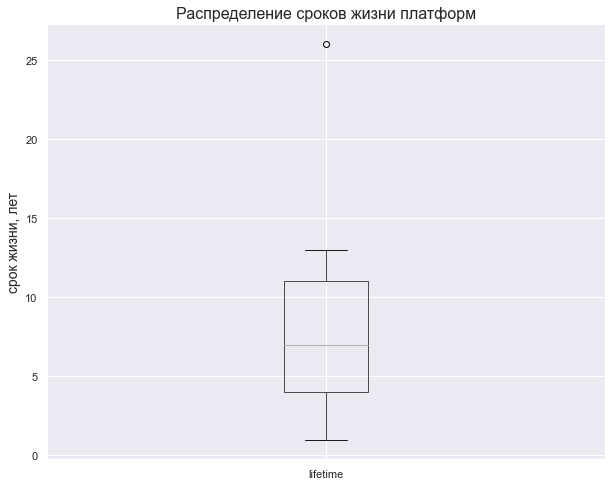

In [45]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 14})

platform_lifetime.boxplot('lifetime');

plt.ylabel("срок жизни, лет",  fontsize=14);
plt.title("Распределение сроков жизни платформ",  fontsize=16);

In [46]:
platform_lifetime.lifetime.describe()

count   31.00
mean     7.68
std      5.08
min      1.00
25%      4.00
50%      7.00
75%     11.00
max     26.00
Name: lifetime, dtype: float64

##### Срок жизни платоформ в среднем
**7 лет** - медианное значение

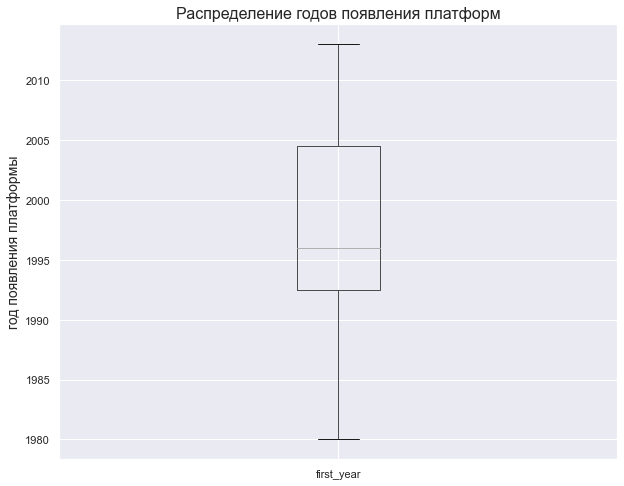

In [47]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 14})

platform_lifetime.boxplot('first_year');

plt.ylabel("год появления платформы",  fontsize=14);
plt.title("Распределение годов появления платформ",  fontsize=16);

In [48]:
platform_lifetime.first_year.describe()

count      31.00
mean    1,997.65
std         9.09
min     1,980.00
25%     1,992.50
50%     1,996.00
75%     2,004.50
max     2,013.00
Name: first_year, dtype: float64

##### 2013 - год технрологического прорыва в игровой индустрии
В этом году самый богатый урожай новых игровых платформ и новых поколений лидеров рынка

##### Количество новых игр по годам выпуска на рынок

Вспомним структуру данных об играх:

In [49]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  all_sales        16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


Сформируем qty_games_per_year - количество игр по годам выпуска

In [50]:
qty_games_per_year = games.pivot_table(index=['year_of_release'], values=['name'], aggfunc = 'count' )

Количество игр по годам выпуска


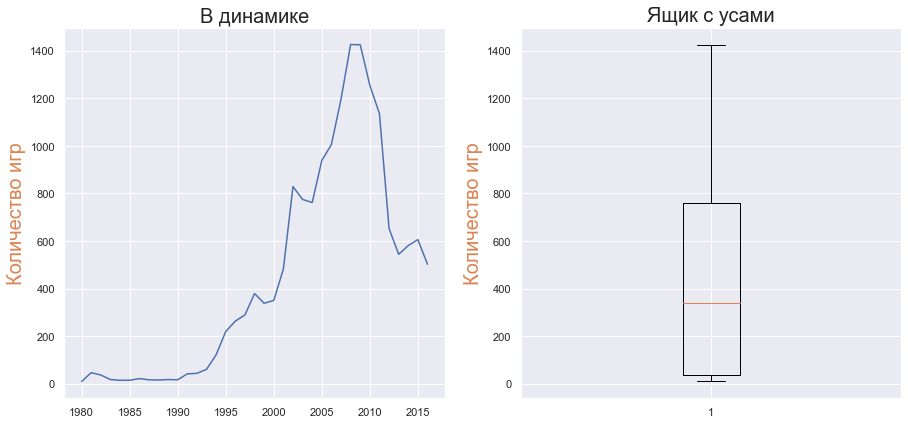

In [51]:
print('Количество игр по годам выпуска')
# setup size plot
sns.set(rc = {'figure.figsize':(15,15)})
fig=plt.figure()
 
ax=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
# plot line graph
ax.plot(qty_games_per_year)
ax.set_ylabel("Количество игр", color="C1",  fontsize=20)
ax.set_title("В динамике",  fontsize=20)
 
# plot box
ax2.boxplot(qty_games_per_year)
ax2.set_ylabel("Количество игр", color="C1",  fontsize=20)
ax2.set_title("Ящик с усами",  fontsize=20)
 
plt.show()

In [52]:
print('Численная сводка')
print(qty_games_per_year.describe())
print(qty_games_per_year)

Численная сводка
          name
count    37.00
mean    444.43
std     451.60
min       9.00
25%      36.00
50%     338.00
75%     762.00
max   1,427.00
                 name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               60
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              653
2013              544
2014              581
2015              606
2016        

##### **2008 - 2010** годы игроманского счастья
* 2008 - 1457 игр
* 2009 - 1476 игр
* 2010 - 1302 игры

### Актуальный период
Формируем усечённую версию таблицы данных на основе проведённого анализа
<a href="#Годы-для-исследования" data-toc-modified-id="Годы-для-исследования-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Годы для исследования</a>  
  
    
    
**2014 - 2015**

In [53]:
# формируем табличку
data = games[games['year_of_release'] >= 2014]
data = data[data['year_of_release'] <= 2015]
data.reset_index(drop=True)

print('Сводка по годам')
print(data.year_of_release.describe())
print()
print('Структура данных')
print(data.info())

Сводка по годам
count   1,187.00
mean    2,014.51
std         0.50
min     2,014.00
25%     2,014.00
50%     2,015.00
75%     2,015.00
max     2,015.00
Name: year_of_release, dtype: float64

Структура данных
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187 entries, 31 to 16707
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1187 non-null   object 
 1   platform         1187 non-null   object 
 2   year_of_release  1187 non-null   Int64  
 3   genre            1187 non-null   object 
 4   na_sales         1187 non-null   float64
 5   eu_sales         1187 non-null   float64
 6   jp_sales         1187 non-null   float64
 7   other_sales      1187 non-null   float64
 8   critic_score     486 non-null    float64
 9   user_score       626 non-null    float64
 10  rating           660 non-null    object 
 11  all_sales        1187 non-null   float64
dtypes: Int64(1), float64(7), object(4)

In [54]:
difference = (len(games['name'])-len(data['name']))/len(games['name'])
print('В таблице данных, отобранных для анализа')
print(len(data['name']), f'записей. Отсечено {difference:.2%} исходных данных.')
print('Отсечено много лишней информации')

В таблице данных, отобранных для анализа
1187 записей. Отсечено 92.90% исходных данных.
Отсечено много лишней информации


### Какие платформы лидируют по продажам, растут или падают? 
Выбераем несколько потенциально прибыльных платформ.

####    Группируем данные продаж по платформам и годам

In [55]:
sales_by_platform = data.groupby(['platform', 'year_of_release'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales'].sum().reset_index()
print(sales_by_platform.head())

  platform  year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
0      3DS             2014     12.33      8.73     20.69         2.01   
1      3DS             2015      6.17      5.06     15.52         1.03   
2       PC             2014      3.51      8.87      0.00         0.90   
3       PC             2015      2.36      5.57      0.00         0.59   
4      PS3             2014     16.39     18.24      6.25         6.88   

   all_sales  
0      43.76  
1      27.78  
2      13.28  
3       8.52  
4      47.76  


In [56]:
sales_by_platform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         20 non-null     object 
 1   year_of_release  20 non-null     Int64  
 2   na_sales         20 non-null     float64
 3   eu_sales         20 non-null     float64
 4   jp_sales         20 non-null     float64
 5   other_sales      20 non-null     float64
 6   all_sales        20 non-null     float64
dtypes: Int64(1), float64(5), object(1)
memory usage: 1.2+ KB


#### Посмотрим графики продаж по каждой платформе в отдельности

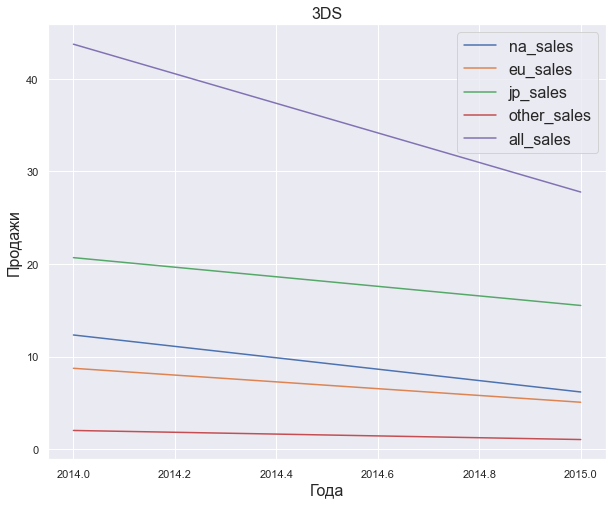

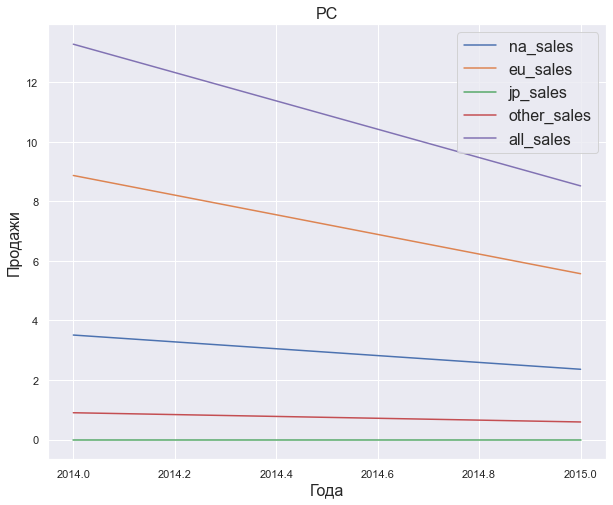

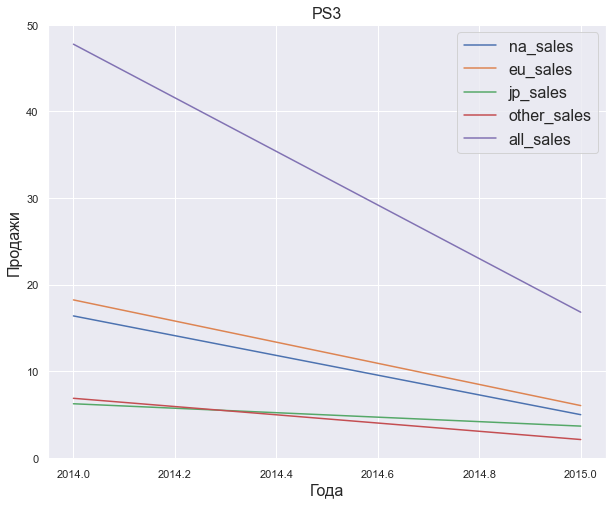

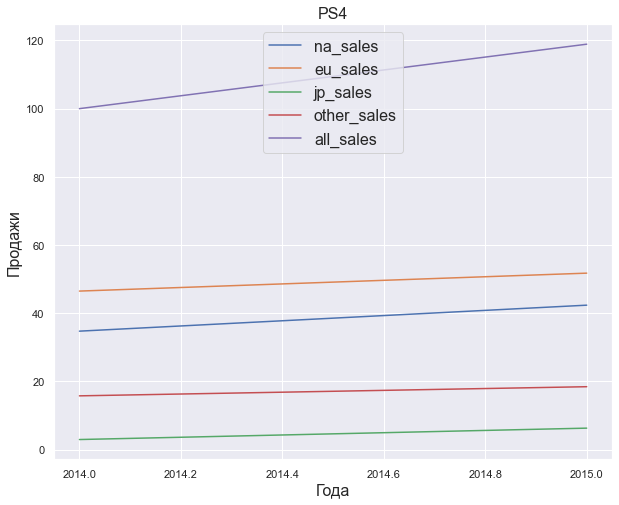

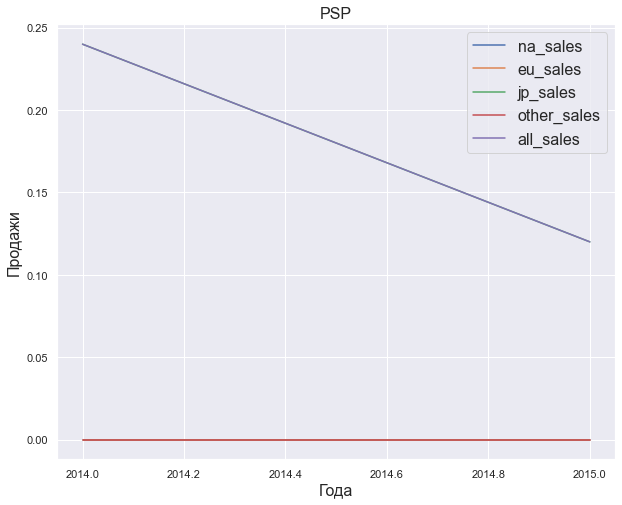

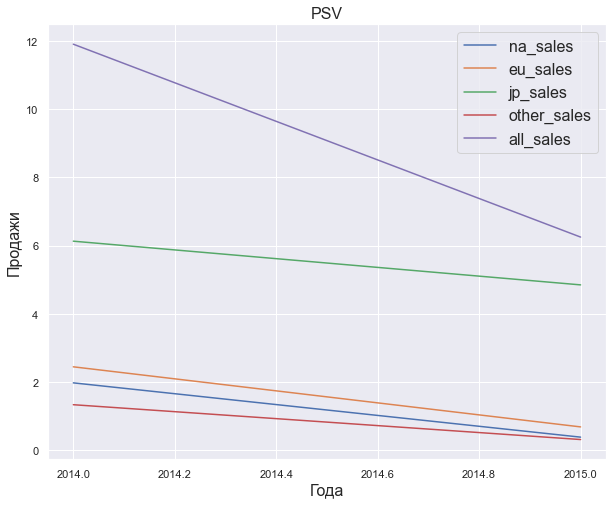

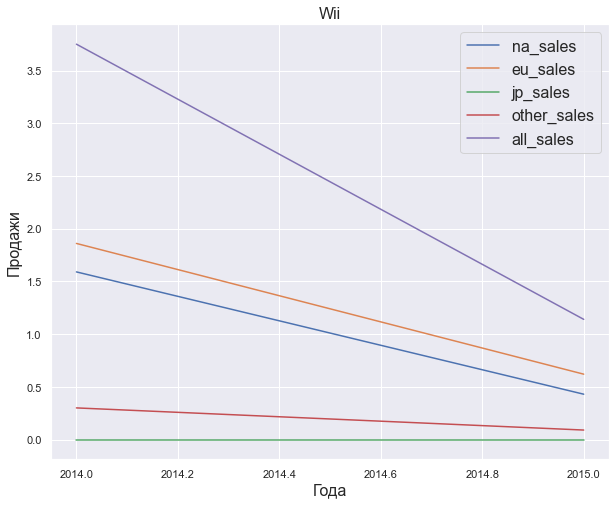

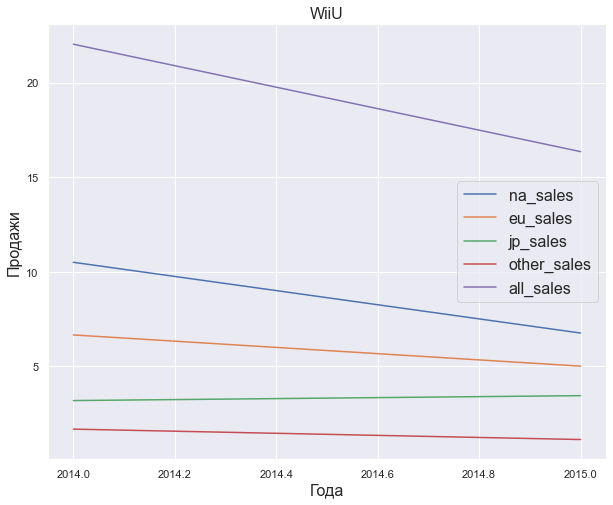

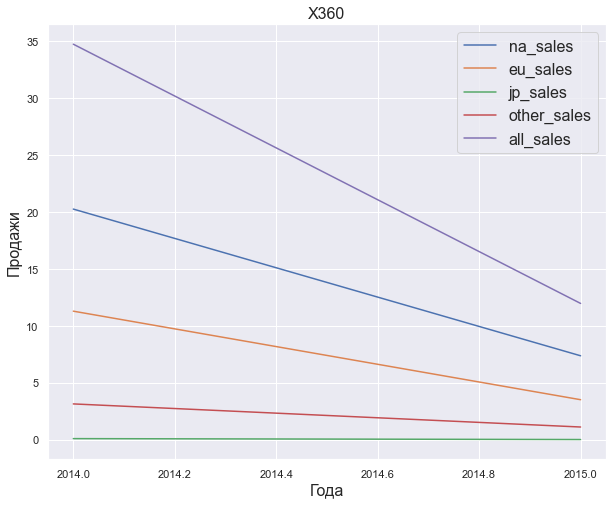

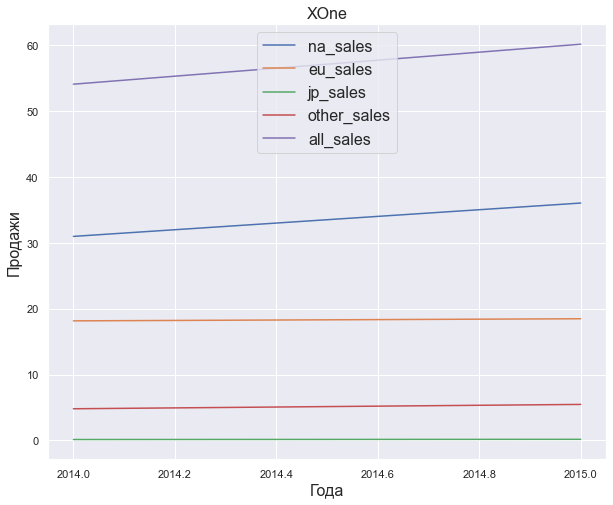

In [57]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 14})
platforms = sales_by_platform['platform'].unique()

for platf in platforms:
    # dataframe for plot
    local_query = sales_by_platform.query('platform == @platf')
    # графики
    plt.plot(local_query['year_of_release'], local_query['na_sales'], label='na_sales');
    plt.plot(local_query['year_of_release'], local_query['eu_sales'], label='eu_sales');
    plt.plot(local_query['year_of_release'], local_query['jp_sales'], label='jp_sales');
    plt.plot(local_query['year_of_release'], local_query['other_sales'], label='other_sales');
    plt.plot(local_query['year_of_release'], local_query['all_sales'], label='all_sales');
    
    plt.legend(fontsize=16);
    plt.title(platf,  fontsize=16)
    plt.ylabel("Продажи", fontsize=16);
    plt.xlabel("Года", fontsize=16);
    plt.show()

#### Глобальные продажи по короткому списку интересных платформ

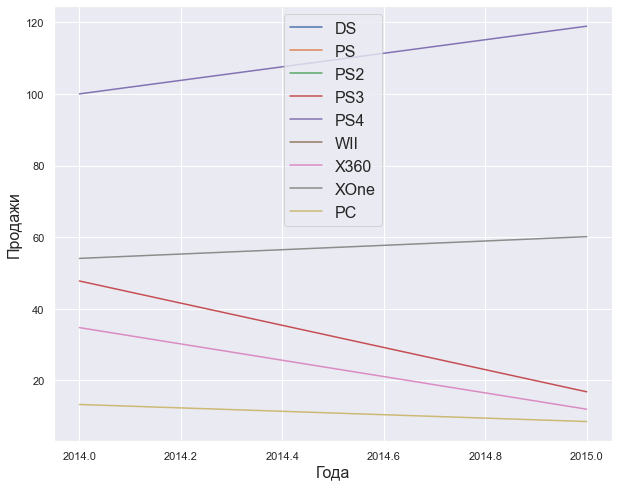

In [58]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 14})
platforms = ['DS', 'PS', 'PS2', 'PS3', 'PS4', 'WII', 'X360', 'XOne', 'PC']

for platf in platforms:
    # dataframe for plot
    local_query = sales_by_platform.query('platform == @platf')
    # графики
    plt.plot(local_query['year_of_release'], local_query['all_sales'], label=platf);
    
    plt.legend(fontsize=16);
    plt.ylabel("Продажи", fontsize=16);
    plt.xlabel("Года", fontsize=16);

#### Продажи растут
##### * PS4
##### * XOne

#### Остальные платформы или ушли с рынка, или на спаде продаж

### Глобальные продажи игр по платформам
в пределах выбранных лет

#### Продажи по платформам за весь актуальный период

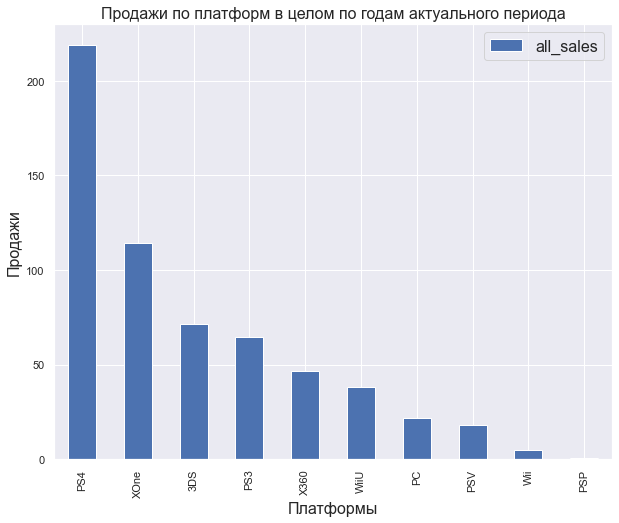

In [59]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
data.pivot_table(index='platform', values ='all_sales', aggfunc=sum).sort_values(by='all_sales', ascending=False).plot(kind='bar');
plt.legend(fontsize=16);
plt.title('Продажи по платформ в целом по годам актуального периода',  fontsize=16)
plt.ylabel("Продажи", fontsize=16);
plt.xlabel("Платформы", fontsize=16);
plt.show()

##### PS в совокупности по поколениям на вершине горы

#### Рассмотрим структуру продаж по платформам

Из продаж по платформам, видим, что самые прибыльные платформы - PS4, XOne, 3DS, PS3.  
Также помним про перспективные платформы: PS4, XOne  

Подготовим данные для визуализации

In [60]:
local_data = data.query('platform in ["PS4", "XOne", "3DS", "PS3"]')

In [61]:
local_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 31 to 16674
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             700 non-null    object 
 1   platform         700 non-null    object 
 2   year_of_release  700 non-null    Int64  
 3   genre            700 non-null    object 
 4   na_sales         700 non-null    float64
 5   eu_sales         700 non-null    float64
 6   jp_sales         700 non-null    float64
 7   other_sales      700 non-null    float64
 8   critic_score     311 non-null    float64
 9   user_score       372 non-null    float64
 10  rating           394 non-null    object 
 11  all_sales        700 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 71.8+ KB


Постороим коробочки с усами.  
Платформа  
Игра продажи

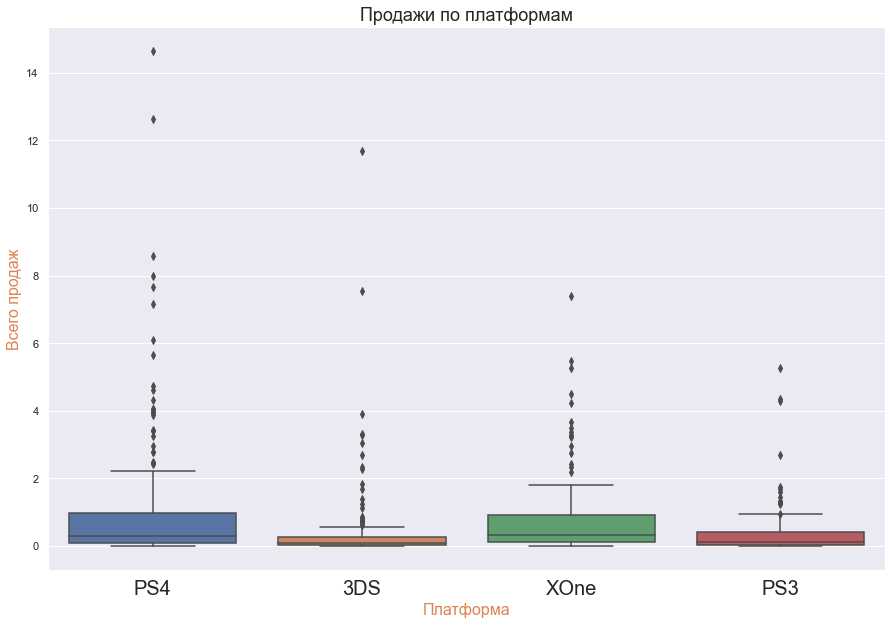

In [62]:
# setup size plot
sns.set(rc = {'figure.figsize':(15,10)})
fig=plt.figure()

ax=fig.add_subplot(111, label="1")

ax = sns.boxplot(x="platform", y="all_sales", data=local_data)
ax.set_xlabel("Платформа", color="C1",  fontsize=16)
ax.set_ylabel("Всего продаж", color="C1",  fontsize=16)
plt.title("Продажи по платформам",  fontsize=18);
plt.xticks(fontsize=20)
plt.show()

Большое количество выбросов затрудняет чтение графиков.  
**Ограничим ось "у"**

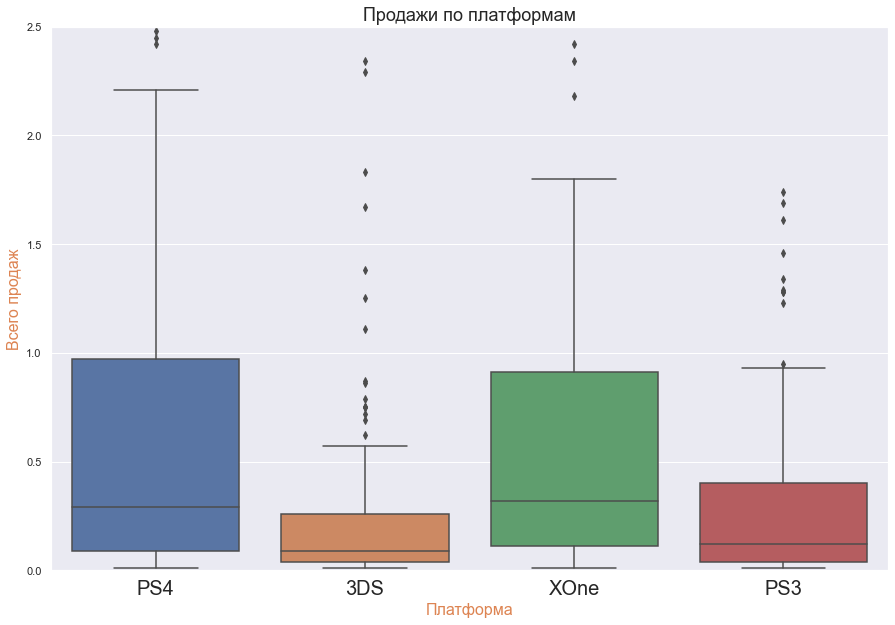

In [63]:
# setup size plot
sns.set(rc = {'figure.figsize':(15,10)})
fig=plt.figure()

ax=fig.add_subplot(111, label="1")

ax = sns.boxplot(x="platform", y="all_sales", data=local_data)
ax.set_xlabel("Платформа", color="C1",  fontsize=16)
ax.set_ylabel("Всего продаж", color="C1",  fontsize=16)
ax.set_ylim(0, 2.5)
plt.title("Продажи по платформам",  fontsize=18);
plt.xticks(fontsize=20)
plt.show()

##### PS4
лидер лидеров
мощная основа с превышением успешных игр по сравнению с менее успешными  
очень большой разбег в сторону уникальных дорогих единичных игр
##### Xone
очень мощная группа игр с базовым уровнем цены
количество супер-хитов  поменьше, чем PS4  
##### PS3  
яркое доказательство живучести поколений платформы PS
##### 3DS
Замыкает четвёрку лидеров  


#### Популярные платформы  
 
* PS4
* XOne


#### Перспективные платформы  
* PS4
* XOne  

### Влияние рейтингов на продажи
В целом по имеющимся данным

In [64]:
# user_score_non_nan_short_list = games.query('platform in @platforms and user_score > 0')

Отберём данные по этим платформам и отсечём NaNы

In [65]:
user_score_non_nan_short_list = games

##### Матрица корреляции

In [66]:
user_score_non_nan_short_list.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.00,-0.09,0.00,-0.17,0.04,0.01,-0.27,-0.08
na_sales,-0.09,1.00,0.77,0.45,0.64,0.24,0.09,0.94
eu_sales,0.00,0.77,1.00,0.44,0.72,0.22,0.06,0.90
jp_sales,-0.17,0.45,0.44,1.00,0.29,0.15,0.13,0.61
other_sales,0.04,0.64,0.72,0.29,1.00,0.20,0.06,0.75
critic_score,0.01,0.24,0.22,0.15,0.20,1.00,0.58,0.25
user_score,-0.27,0.09,0.06,0.13,0.06,0.58,1.00,0.09
all_sales,-0.08,0.94,0.90,0.61,0.75,0.25,0.09,1.00


**Сильная** корелляция между  
na_sales и eu_sales  
**Слабая** корелляция между  
user_score и продажи  
**Есть некоторая связь**  между  
продажи и critic_score

##### Матрица рассеяния

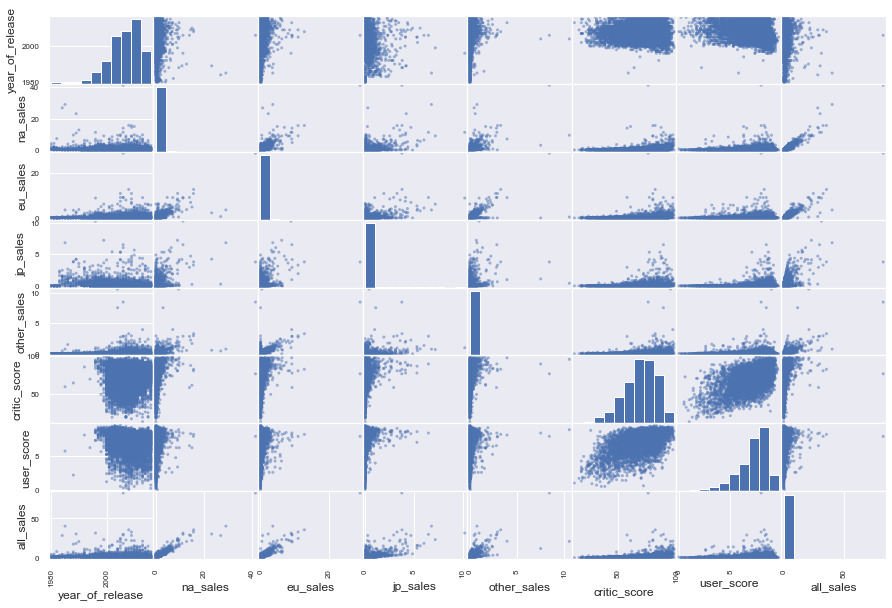

In [67]:
pd.plotting.scatter_matrix(games);

Прямые зависимости:  
* оценки пользователей и критиков 
* продажи по регионам в целом схожи
* * Япония имеет особенности  

Размытые прямые зависимости
* оценки пользователей и продажи
* оценки критиков и продажи

#### Оценки пользователей

##### Диаграмма рассеяния

**В целом**

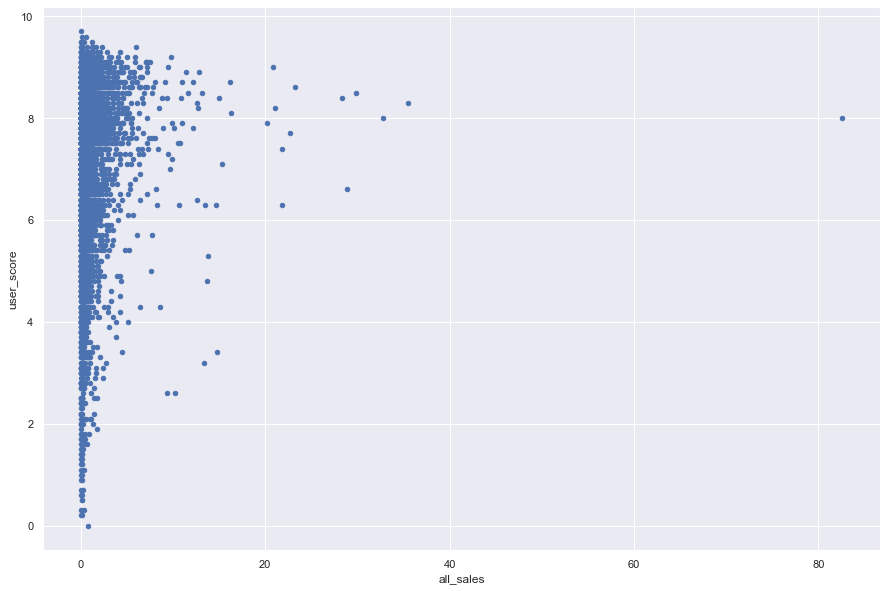

In [68]:
games.plot(kind='scatter', x='all_sales', y='user_score', color='C0');

##### По диаграмме в целом:
* игры с малым пользовательским рейтингом **до 3х** продаются плохо
* игр с малым **до 3х** рейтингом - небольшое количество
* высокие продажи **более 15 млн** у игр с **высоким, более 6-ти**, рейтингом
* самые высокие продажи у игр с рейтингом **более 8-ми**

**Раздельно** по платформам  
из первой десятки по популярности

In [69]:
platforms = games.pivot_table(index='platform', values ='all_sales',\
     aggfunc=sum).sort_values(by='all_sales', ascending=False).reset_index()['platform'].head(10)

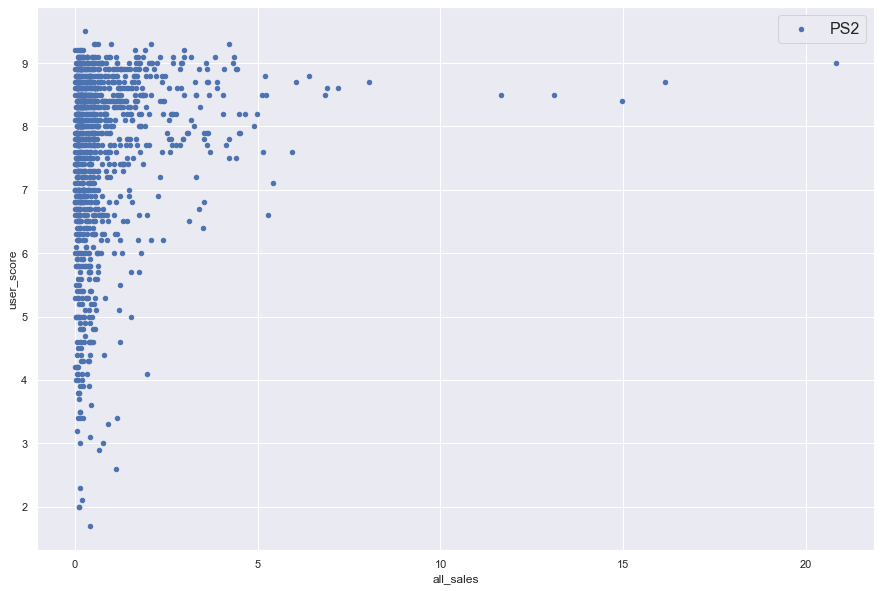

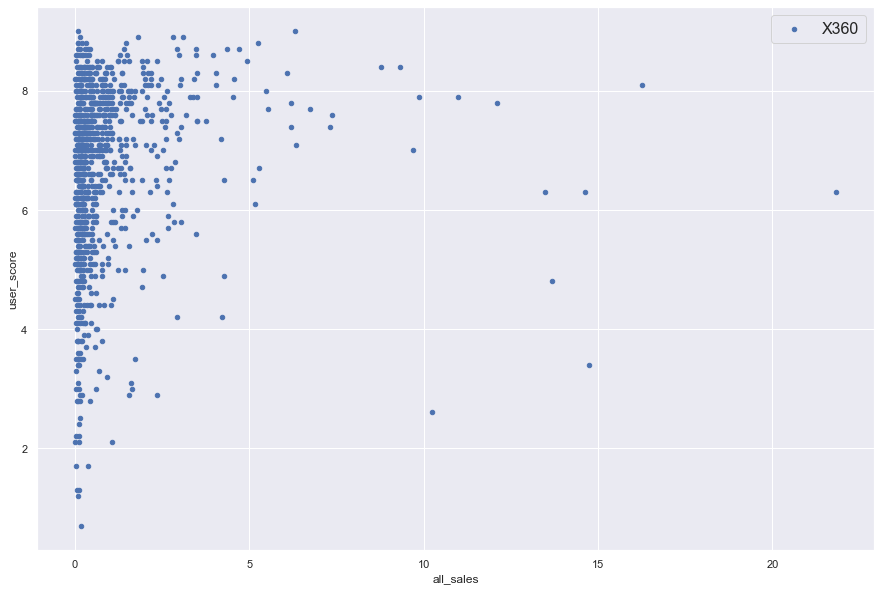

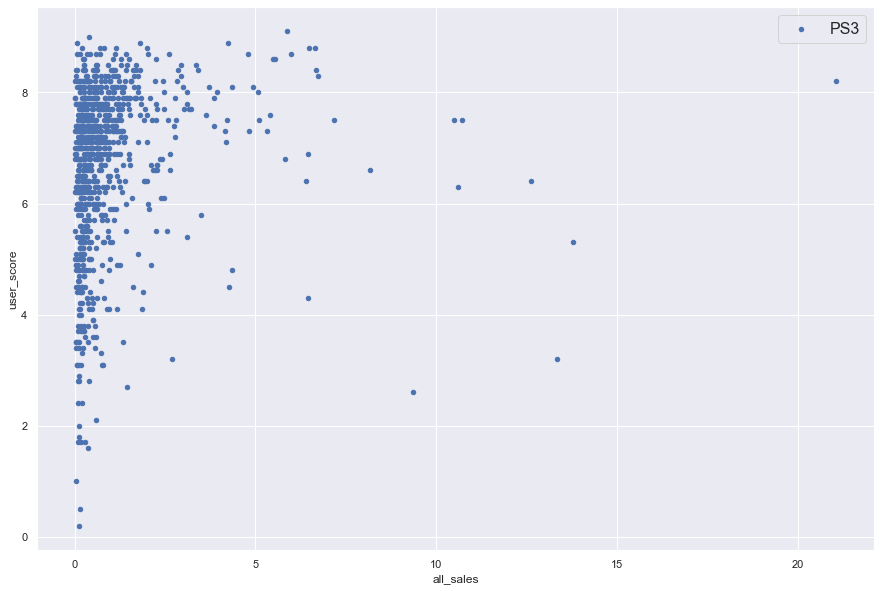

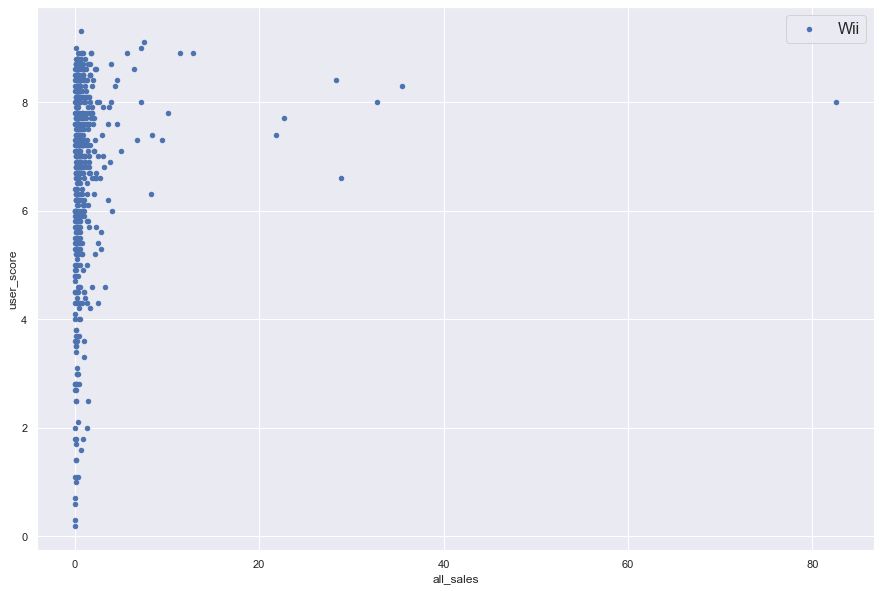

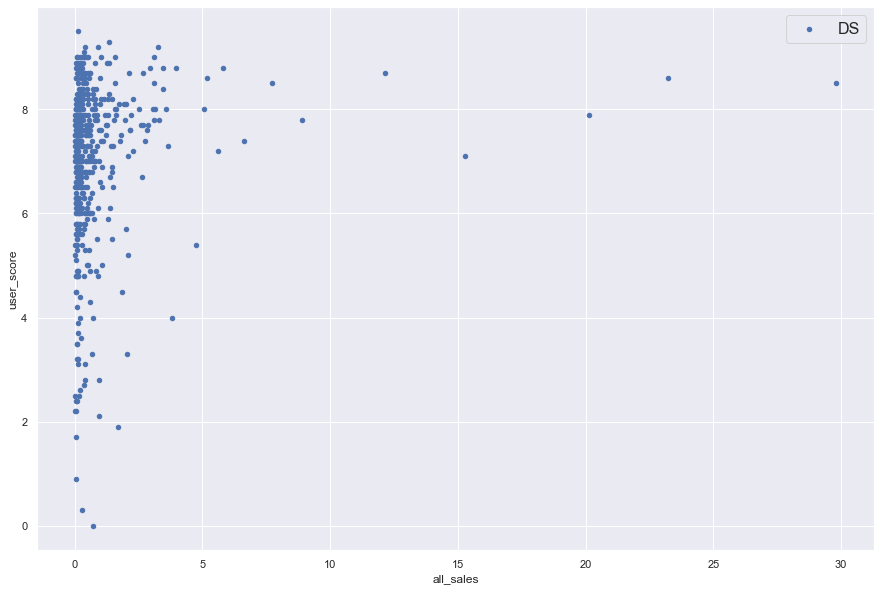

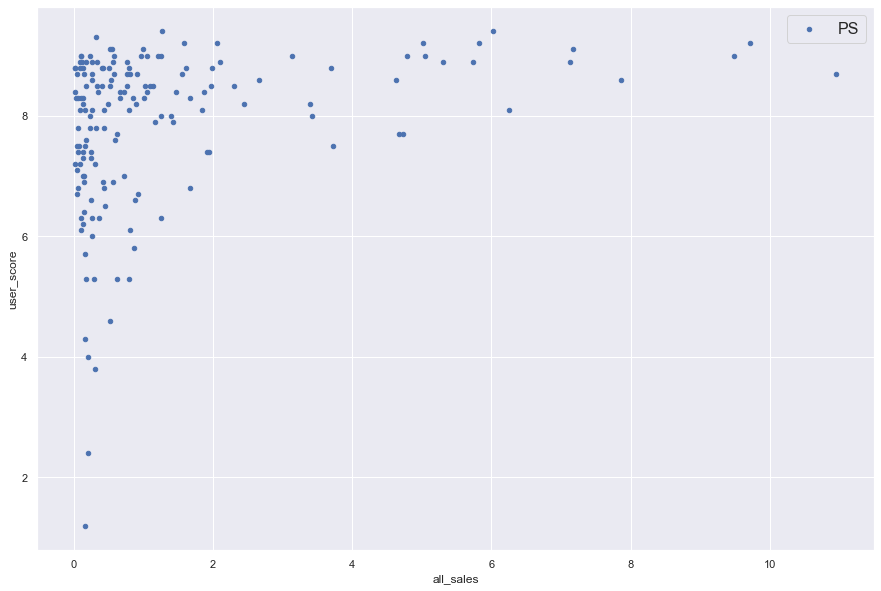

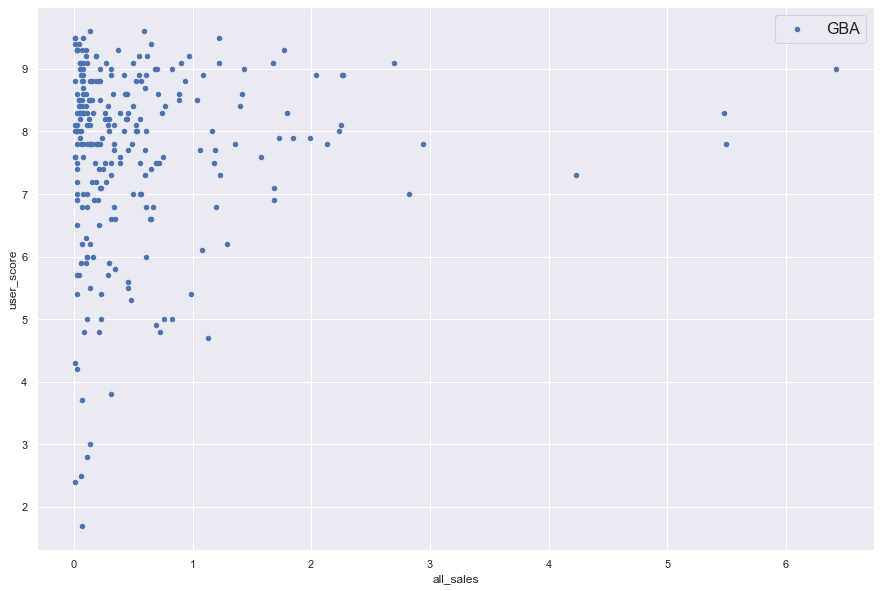

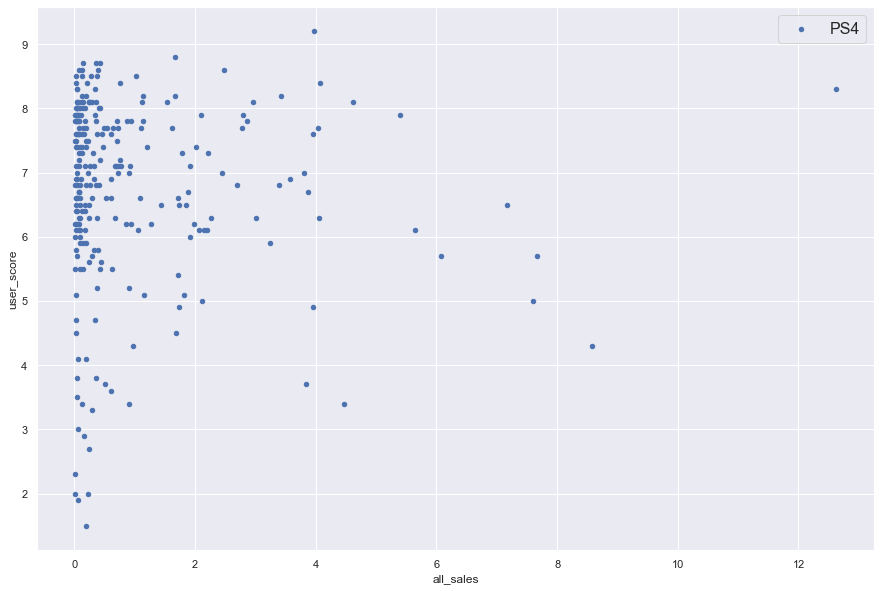

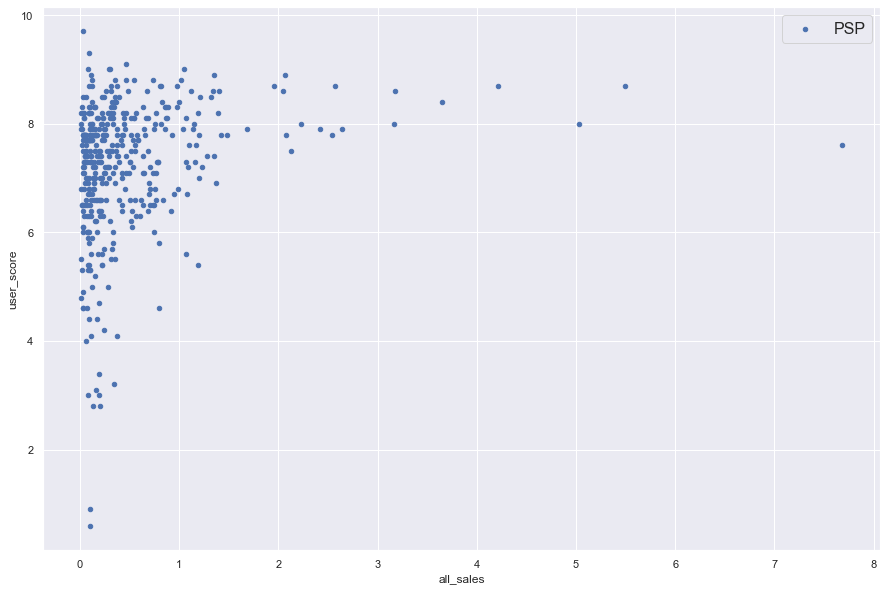

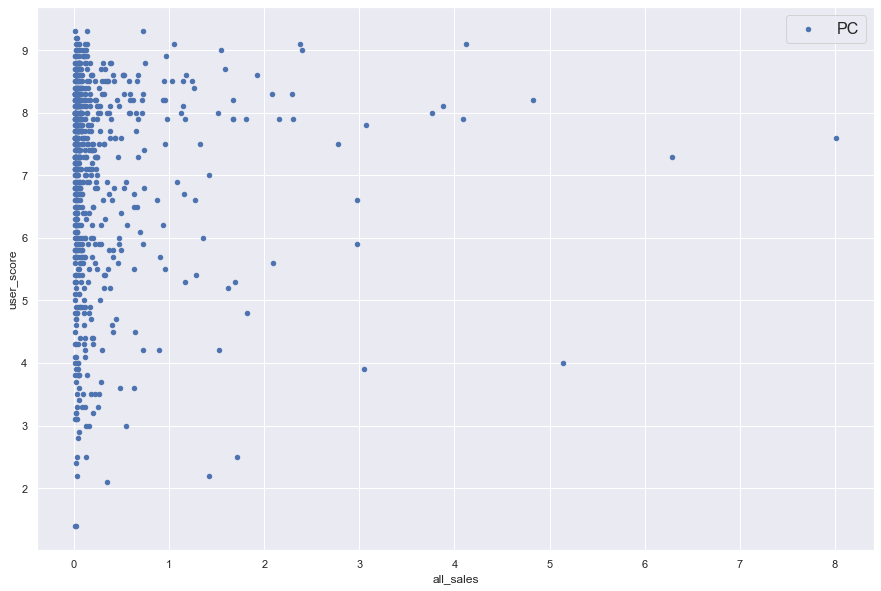

In [70]:
for i in range(len(platforms)):
    pl=platforms[i]
    user_score_non_nan_short_list.query('platform == @pl').plot(kind='scatter',
     x='all_sales', y='user_score', color='C0', label=pl)
    plt.legend(  fontsize=16)

##### Раздельно по платформам:
* общие выводы подтверждаются с некоторыми особенностями

Выделяется сектор **PC**  
Здесь очень размыта корреляция между оценками и количеством продаж.  

Молодая платформа **PS4** очаровывает массы своей новизной.  

А **WII** не смогла вырваться в лидеры рынка, а ведь она была прекрасна и онновационна!

#### Оценки критиков

##### Диаграмма рассеяния

**В целом**

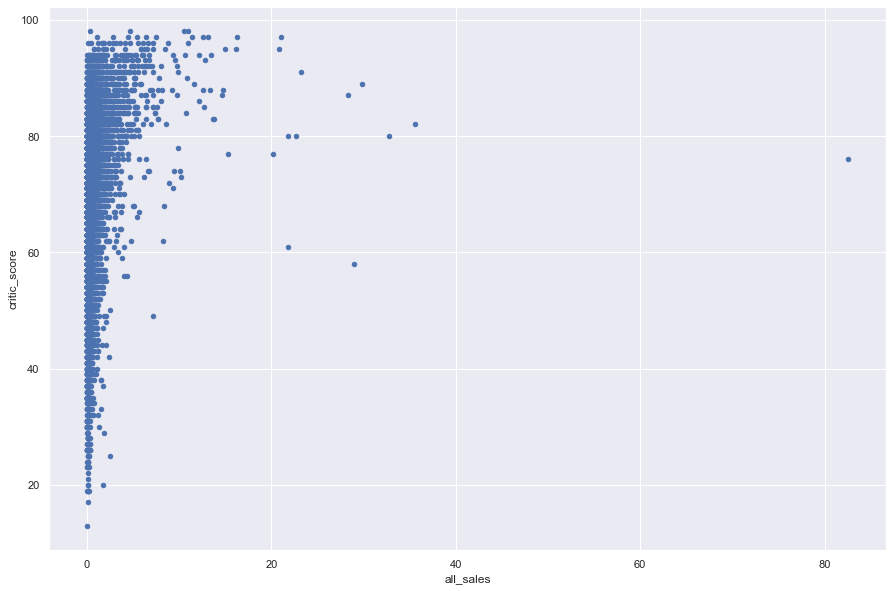

In [71]:
games.plot(kind='scatter', x='all_sales', y='critic_score', color='C0');

##### По диаграмме в целом:
* игры с малым пользовательским рейтингом **до 60** продаются плохо
* игр с малым **до 40** рейтингом - небольшое количество
* высокие продажи **более 15 млн** у игр с **высоким, более 75**, рейтингом
* самые высокие продажи у игр с рейтингом **более 90**  

**Диаграмма зависимости продаж от оценки критиков имеет более выраженный характер, чем от оценки пользователей**

##### **Раздельно** по платформам

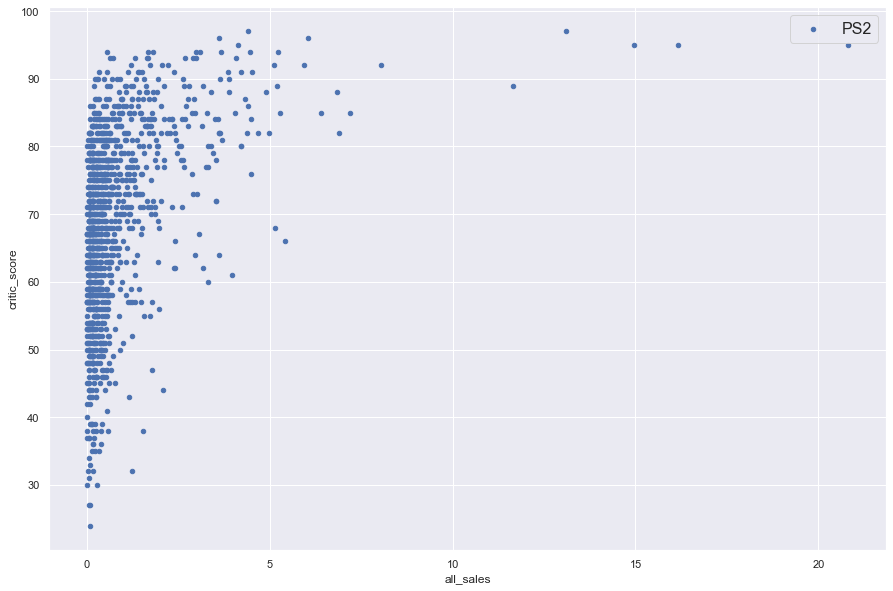

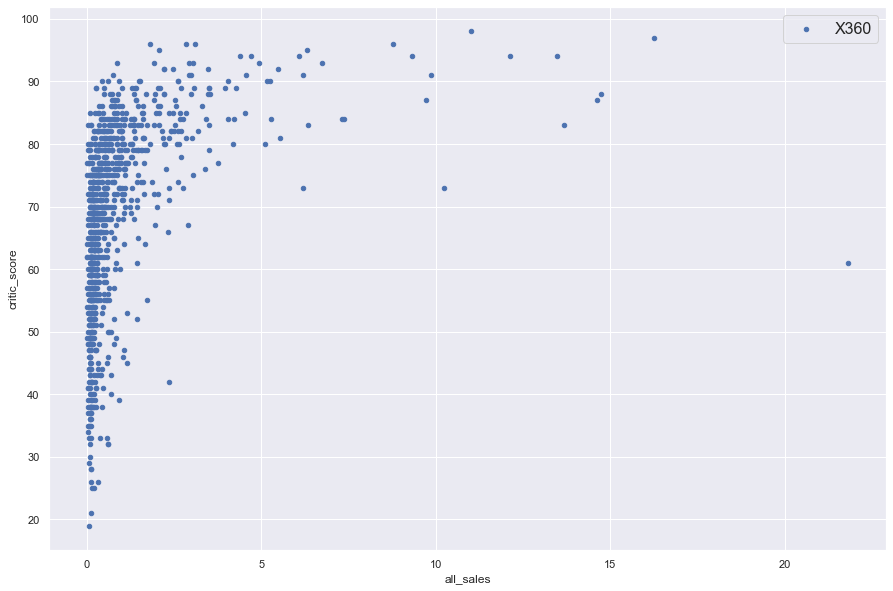

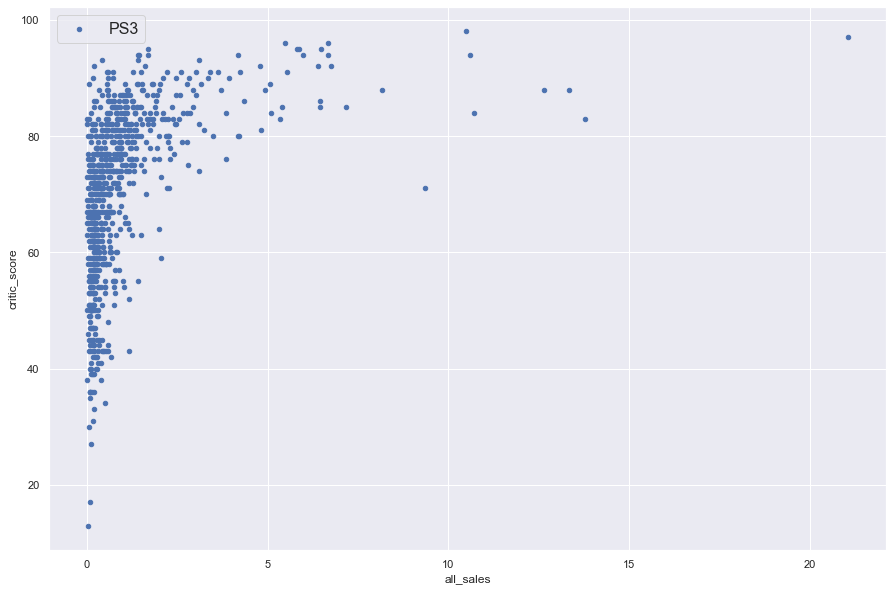

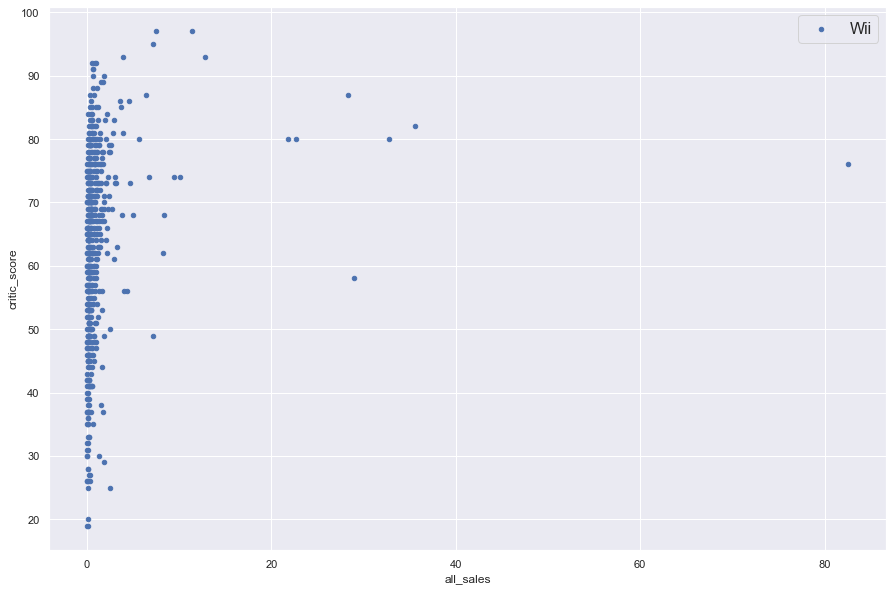

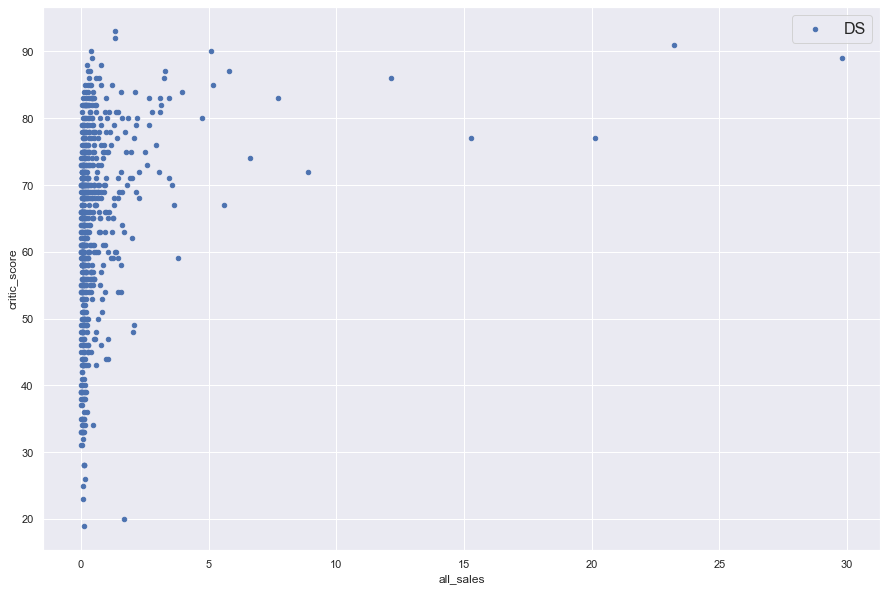

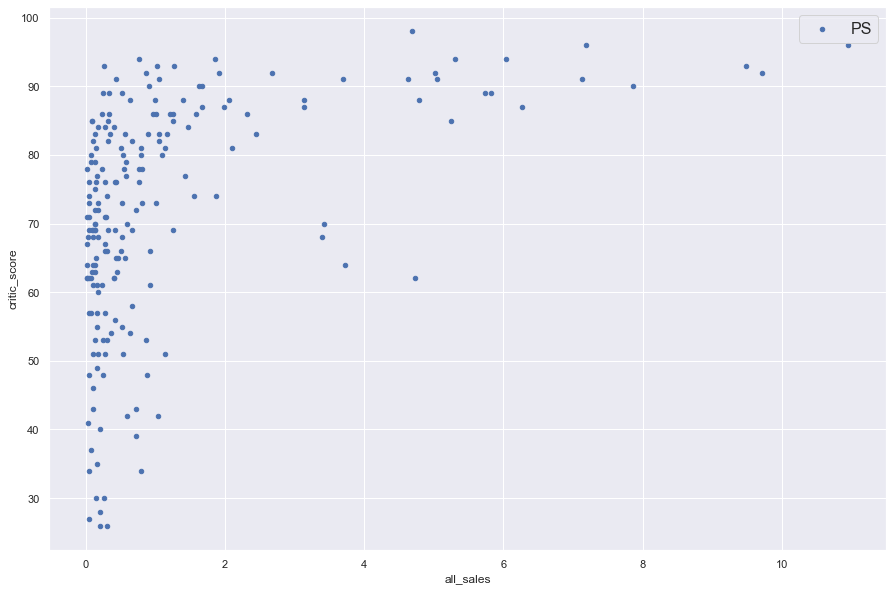

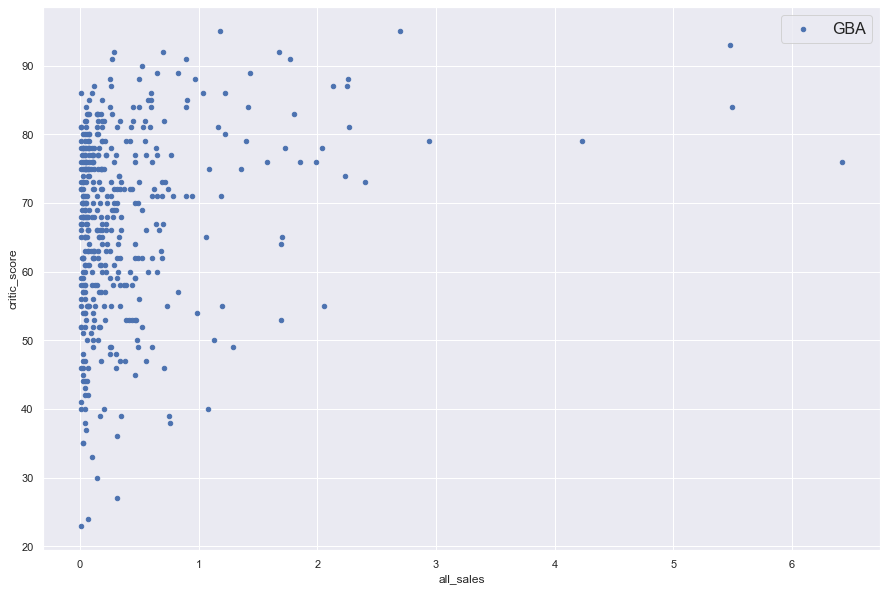

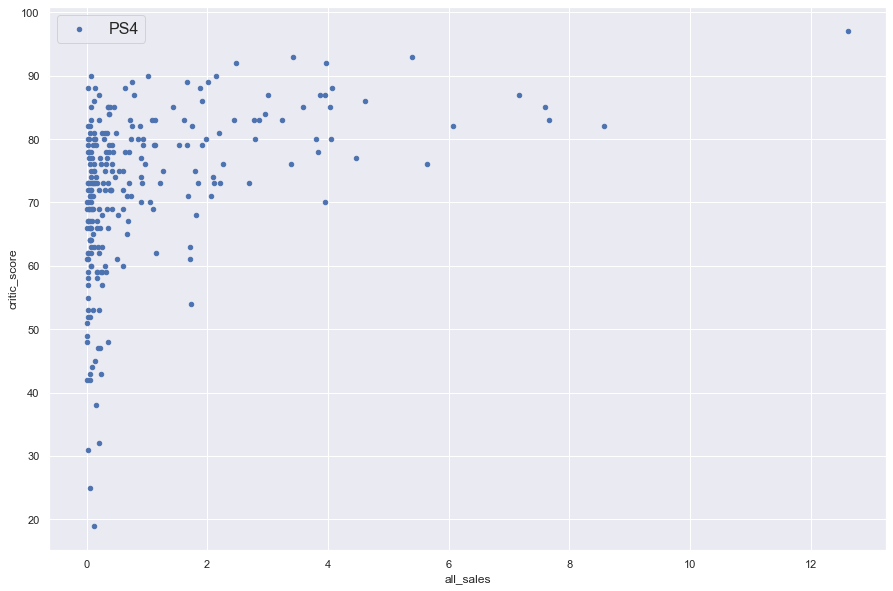

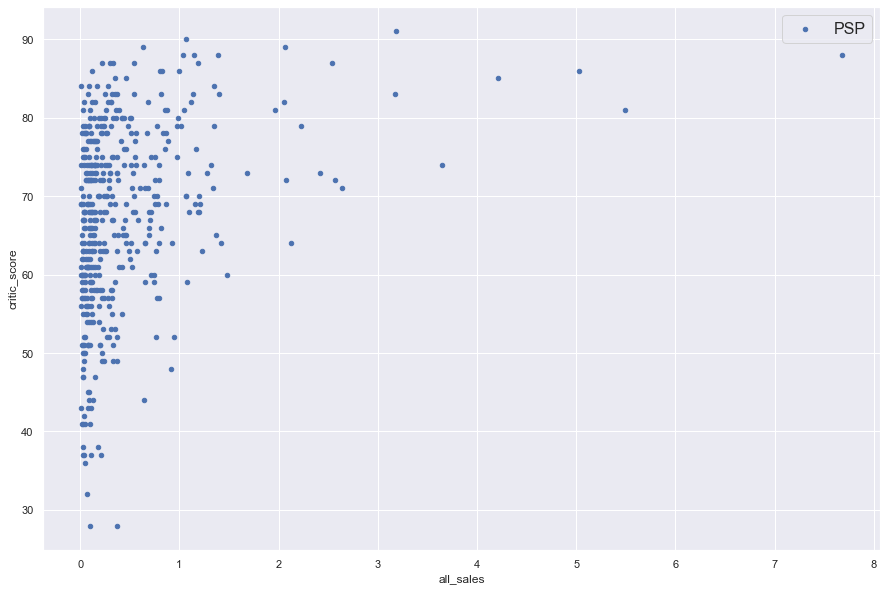

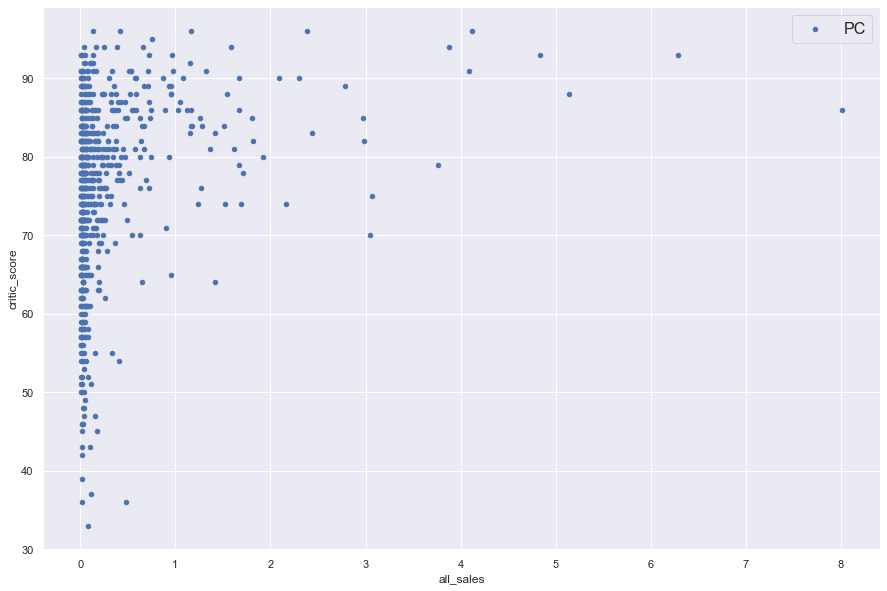

In [72]:
for i in range(len(platforms)):
    pl=platforms[i]
    games.query('platform == @pl').plot(kind='scatter',
     x='all_sales', y='critic_score', color='C0', label=pl)
    plt.legend(  fontsize=16)

##### Раздельно по платформам:
* общие выводы подтверждаются с некоторыми особенностями

**WII** - аутсайдер и мне грустно.  

По остальным платформам корреляция между продажами и оценками критиков просматривается очень хорошо.

#### Вывод по рейтингам

При выборе игр для продаж в рамках платформы можно смело ориентироваться на рейтинги критиков.  
Оценки пользователей - не существенный фактор. 
Может быть применён при рекламе закупленных игр.

### Распределение игр по жанрам
* самые прибыльные жанры
* min/max продаж по жанрам  
- Для **актуального периода** (data)  
- По потенциально прибыльным **платформам** platforms  


In [74]:
# data_actual = data.query('platform in @platforms').reset_index(drop=True)

#### Жанры:

In [75]:
print(len(data.genre.unique()), 'жанров')
print(sorted(data.genre.unique()))

12 жанров
['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']


#### Коробочки с усами по всем продажам по-жанрово

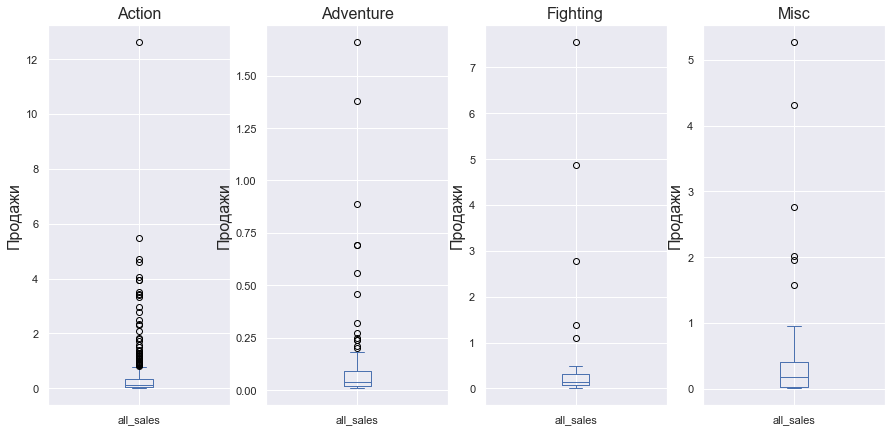

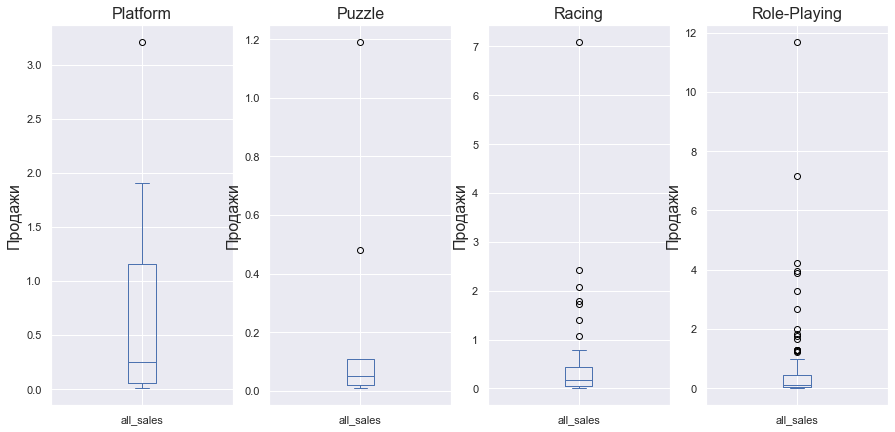

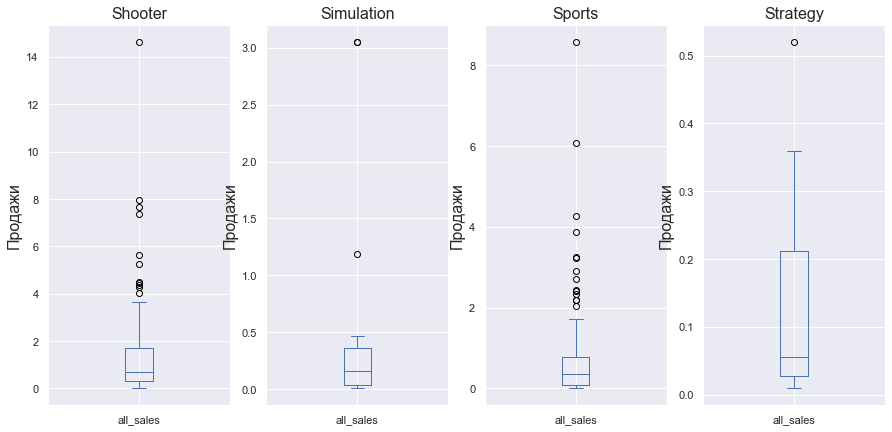

In [76]:
# setup size plot
sns.set(rc = {'figure.figsize':(15,7)})
plt.rcParams.update({'font.size': 14})


# список genre
genres = sorted(data['genre'].unique())

# если количество жанров 12
if len(genres) == 12:
    # строим 12 графиков по 4 в ряд
    # 3 ряда
    g=0 # порядковый номер жанра (для графика)
    for i in [1,2,3]: # строки в матрице графиков
        for j in [1,2,3,4]:
            # колонки в матрице графиков
            # определяем жанр
            genr = genres[g]
            # dataframe for plot
            local_query = data.query('genre == @genr')            
            # первый график в строке
            plt.subplot(1,4,j)
            local_query.boxplot('all_sales', color='C0');
            plt.title(genr,  fontsize=16)
            plt.ylabel("Продажи", fontsize=16);
            #переход к следующей платформе для следующего графика
            g += 1
        # закрываем цикл построения строки
        plt.show()
        # переход к следующей платформе для следующего графика
        
# если количество жанров НЕ 12    
else:
    print('Количество жанров отличается от 12')
    print('Следует перенастроить вывод графиков')
    sys.exit()

Во всех жанрах картина продаж неоднородна.  
Очень много выбросов.  
Значит, хитовость и хайповость конкретной игры - основной фактор высоких продаж в целом. 
Далее рассмотрим рейтинг жанров:

#### Продажи по жанрам за весь актуальный период

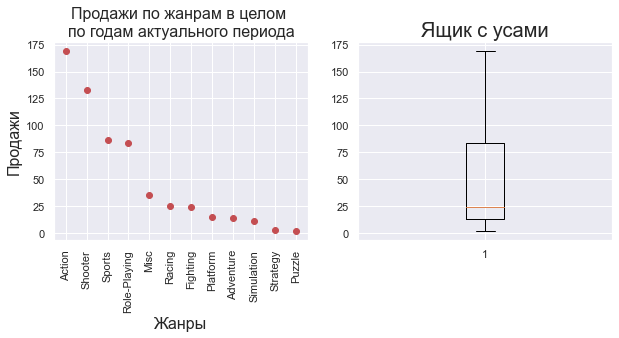

In [77]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
# сводная таблица, отсортированная по суммам
sales_by_genre = data.pivot_table(index='genre', 
    values ='all_sales', aggfunc=sum).sort_values(by='all_sales', ascending=False)
# графики
# подговка для двух полей графиков
fig=plt.figure()
ax=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
# график слева
ax.plot(sales_by_genre, 'ro');
ax.set_title('Продажи по жанрам в целом \nпо годам актуального периода',  fontsize=16)
ax.set_ylabel("Продажи", fontsize=16);
ax.set_xlabel("Жанры", fontsize=16);
ax.tick_params(axis='x', labelrotation = 90)
# график справа
ax2.boxplot(sales_by_genre)
ax2.set_title("Ящик с усами",  fontsize=20)
plt.show()

#### Вывод по жанрам

1. Хитовость и хайповость конкретной игры - основной фактор высоких продаж в целом
2. **Action** - жанр игр, взобравшийся на вершину популярности с невообразимым отрывом от других жанров
3. **Spots** и **Shooter** - следуют за Action с существенным отрывом.
4. **Крепкие середнячки** - Role-Playing, Racing, Misc  
5. **Аутсайдеры** - Adventure, Puzzle, Strategy

**Куда катится мир? Игры для умных (Adventure, Puzzle, Strategy) нынче в аутсайдерах...**

#### Продажи по жанрам  
посмотрим на медианы продаж

группируем по жанрам  
смотрим все продажи  
строим график коробочки на одном графике

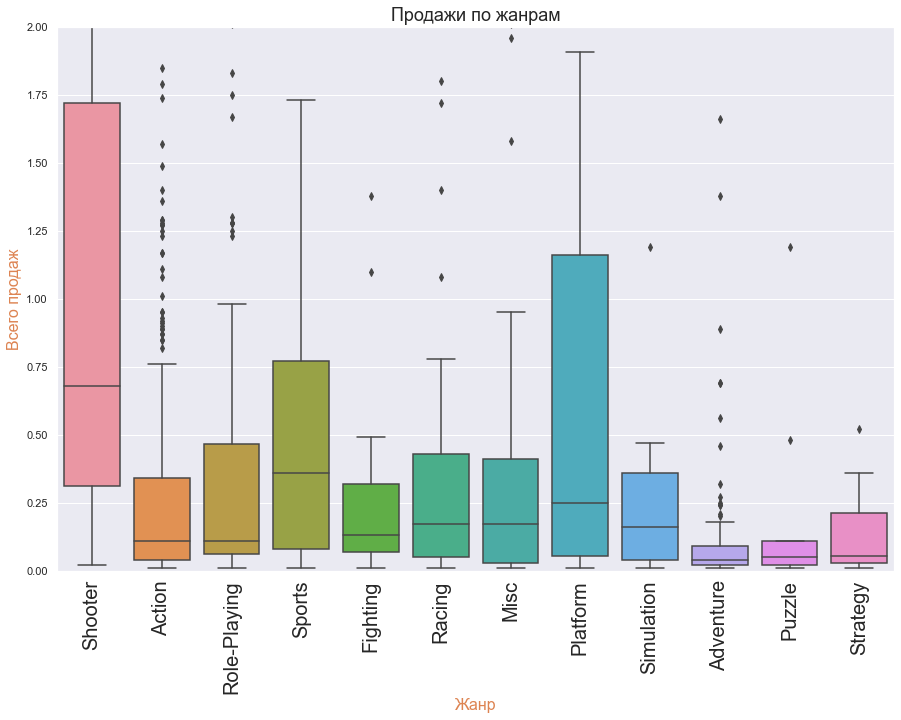

In [78]:
# setup size plot
sns.set(rc = {'figure.figsize':(15,10)})
fig=plt.figure()

ax=fig.add_subplot(111, label="1")

ax = sns.boxplot(x="genre", y="all_sales", data=data)
ax.set_xlabel("Жанр", color="C1",  fontsize=16)
ax.set_ylabel("Всего продаж", color="C1",  fontsize=16)
ax.set_ylim(0, 2.0)
plt.title("Продажи по жанрам",  fontsize=18);
plt.xticks(fontsize=20, rotation=90)
plt.show()

Рейтинг жанров
genre
Shooter        0.68
Sports         0.36
Platform       0.25
Misc           0.17
Racing         0.17
Simulation     0.16
Fighting       0.13
Action         0.11
Role-Playing   0.11
Strategy       0.06
Puzzle         0.05
Adventure      0.04
Name: all_sales, dtype: float64


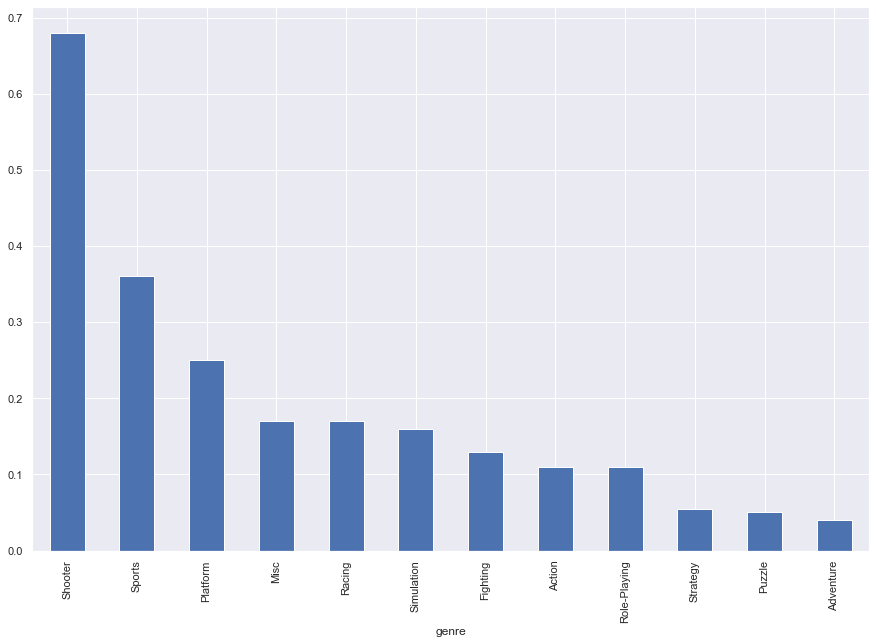

In [79]:
# медианы
data.groupby(by='genre', dropna=True)['all_sales'].median().sort_values(ascending=False).plot(kind='bar');
print("Рейтинг жанров")
print(data.groupby(by='genre', dropna=True)['all_sales'].median().sort_values(ascending=False))

1. **Shooter** - лидер рынка
2. **Sports** - в половину меньше
3. **Platform** - рядом со Sports
4. **Крепкие середнячки** - Misc, Racing, Simulation
5. Следом идут **Fighting, Action, Role-Playing**
5. **Аутсайдеры** - Adventure, Puzzle, Strategy

### Исследовательский анализ - выводы

#### 2014 - 2015 - интервал для прогнозирования

#### Лидеры продаж за всё время 

In [80]:
sales_up_600

platform
PS2    1,255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: all_sales, dtype: float64

#### **7 лет** - срок жизни платформ  
(медианное значение)

#### 2013 - год технологического прорыва в игровой индустрии
В этом году самый богатый урожай новых игровых платформ и новых поколений лидеров рынка

#### **2008 - 2010** годы игроманского счастья
* 2008 - 1457 игр
* 2009 - 1476 игр
* 2010 - 1302 игры

По **актуальному периоду**

#### Продажи растут
##### * PS4
##### * XOne

#### Популярные платформы

##### PS4
лидер лидеров
мощная основа с превышением успешных игр по сравнению с менее успешными  
очень большой разбег в сторону уникальных дорогих единичных игр
##### XOne
очень мощная группа игр с базовым уровнем цены
количество супер-хитов  поменьше, чем PS4  
##### PS3  
яркое доказательство живучести поколений платформы PS
##### 3DS
Замыкает четвёрку лидеров  


#### Влияние рейтингов на продажи

При выборе игр для продаж в рамках платформы можно смело ориентироваться на рейтинги критиков.
Оценки пользователей - не существенный фактор. Может быть применён при рекламе закупленных игр

#### Рейтинг жанров

Рейтинг жанров
genre
Shooter        0.68
Sports         0.36
Platform       0.25
Misc           0.17
Racing         0.17
Simulation     0.16
Fighting       0.13
Action         0.11
Role-Playing   0.11
Strategy       0.06
Puzzle         0.05
Adventure      0.04
Name: all_sales, dtype: float64


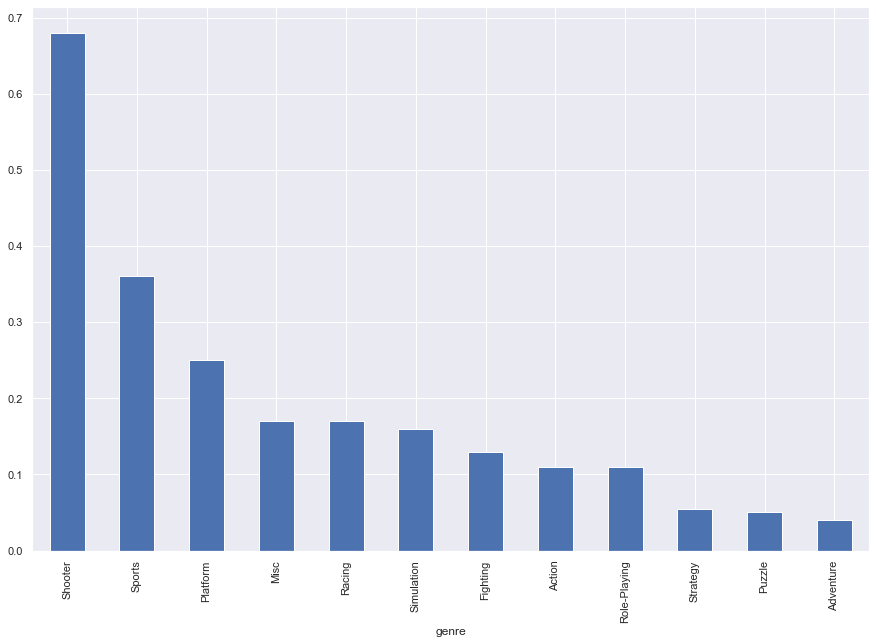

In [81]:
# медианы
data.groupby(by='genre', dropna=True)['all_sales'].median().sort_values(ascending=False).plot(kind='bar');
print("Рейтинг жанров")
print(data.groupby(by='genre', dropna=True)['all_sales'].median().sort_values(ascending=False))

1. Хитовость и хайповость конкретной игры - основной фактор высоких продаж в целом
2. **Shooter** - жанр игр, взобравшийся на вершину популярности с невообразимым отрывом от других жанров
3. **Sports** и **Platform** - следуют за Action с существенным отрывом.
4. **Крепкие середнячки** - Simulation, Racing, Misc  .... 


## Портрет пользователя каждого региона

In [82]:
# подсчитаем суммы продаж тотально по регионам
# в пределах актуального периода]
# в соттвествующие переменные
na_totel_sales = data['na_sales'].sum()
eu_totel_sales = data['eu_sales'].sum()
jp_totel_sales = data['jp_sales'].sum()
other_totel_sales = data['other_sales'].sum()
# сумма всех продаж
all_totel_sales = data['all_sales'].sum()
print('Доли продаж по регионам')
print(f'{na_totel_sales/all_totel_sales:.0%} Северная Америка')
print(f'{eu_totel_sales/all_totel_sales:.0%} Европа')
print(f'{jp_totel_sales/all_totel_sales:.0%} Япония')
print(f'{other_totel_sales/all_totel_sales:.0%} Другие регионы')

Доли продаж по регионам
40% Северная Америка
37% Европа
12% Япония
11% Другие регионы


### Северная Америка

Сформируем табличку данных актуального периода по Северной Америке

In [83]:
# оставим только строки, в которых есть продажи указанного региона
na = data.query('na_sales > 0').reset_index(drop=True)
# удалим лишние колонки eu_sales, jp_sales, other_sales
na = na.drop(['eu_sales', 'jp_sales', 'other_sales'], axis=1)
print('Информация по данным:')
print(na.info())
print('Первые строки:')
display(na.head())
print('Сводка по численным значениям:')
print(na.describe())

Информация по данным:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             699 non-null    object 
 1   platform         699 non-null    object 
 2   year_of_release  699 non-null    Int64  
 3   genre            699 non-null    object 
 4   na_sales         699 non-null    float64
 5   critic_score     388 non-null    float64
 6   user_score       504 non-null    float64
 7   rating           517 non-null    object 
 8   all_sales        699 non-null    float64
dtypes: Int64(1), float64(4), object(4)
memory usage: 50.0+ KB
None
Первые строки:


,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,NaN,NaN,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,97.00,8.30,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,NaN,NaN,NaN,11.68
3,FIFA 16,PS4,2015,Sports,1.12,82.00,4.30,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,NaN,NaN,NaN,7.98


Сводка по численным значениям:
       year_of_release  na_sales  critic_score  user_score  all_sales
count           699.00    699.00        388.00      504.00     699.00
mean          2,014.46      0.34         72.26        6.56       0.80
std               0.50      0.62         12.80        1.53       1.44
min           2,014.00      0.01         19.00        1.50       0.01
25%           2,014.00      0.05         66.00        5.70       0.12
50%           2,014.00      0.13         74.00        6.90       0.32
75%           2,015.00      0.35         81.00        7.70       0.75
max           2,015.00      6.03         97.00        9.30      14.63


#### Платформы

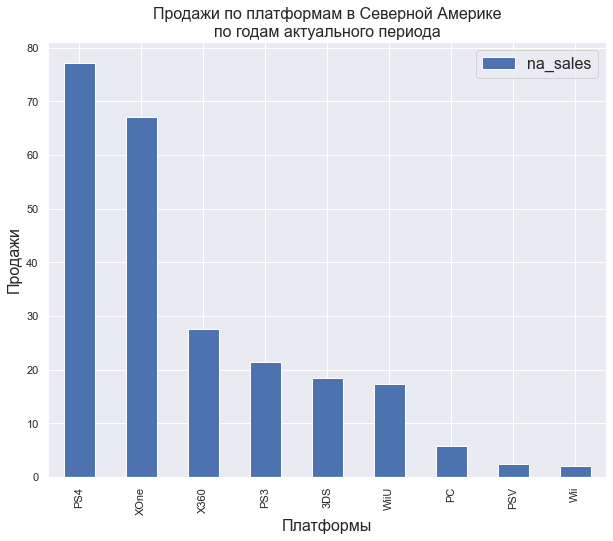

In [84]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
na.pivot_table(index='platform', values ='na_sales', aggfunc=sum).sort_values(by='na_sales', \
                ascending=False).plot(kind='bar');
plt.legend(fontsize=16);
plt.title('Продажи по платформам в Северной Америке\nпо годам актуального периода',  fontsize=16)
plt.ylabel("Продажи", fontsize=16);
plt.xlabel("Платформы", fontsize=16);
plt.show()

Лидеры продаж в Северной Америке по платформам:  
1. PS4
2. XOne
  
Середнечки:
1. X360 
2. PS3
3. 3DS  
4. WIIU

Лидеры **совпадают**  с глобальным рынком
<a href="#Популярные-платформы" data-toc-modified-id="Популярные-платформы-4.6.3"><span class="toc-item-num">4.6.3&nbsp;&nbsp;</span>Популярные платформы</a>

#### Жанры

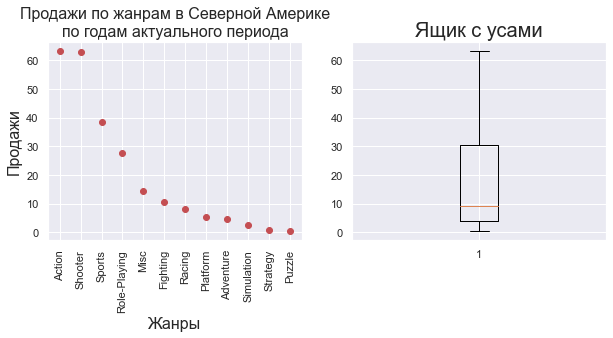

In [85]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
# сводная таблица, отсортированная по суммам
sales_by_genre = na.pivot_table(index='genre', 
    values ='na_sales', aggfunc=sum).sort_values(by='na_sales', ascending=False)
# графики
# подговка для двух полей графиков
fig=plt.figure()
ax=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
# график слева
ax.plot(sales_by_genre, 'ro');
ax.set_title('Продажи по жанрам в Северной Америке\nпо годам актуального периода',  fontsize=16)
ax.set_ylabel("Продажи", fontsize=16);
ax.set_xlabel("Жанры", fontsize=16);
ax.tick_params(axis='x', labelrotation = 90)
# график справа
ax2.boxplot(sales_by_genre)
ax2.set_title("Ящик с усами",  fontsize=20)
plt.show()

Рейтинг жанров в Северной Америке похож на рейтинг жанров на глобальном рынке  
  </span></li><li><span><a href="#Продажи-по-жанрам-за-весь-актуальный-период" data-toc-modified-id="Продажи-по-жанрам-за-весь-актуальный-период-4.8.3"><span class="toc-item-num">4.8.3&nbsp;&nbsp;</span>Продажи по жанрам за весь актуальный период</a>
 

#### **critic_score** - зависимость продаж от  оценки критиков

In [86]:
na_critic_score = na.query('critic_score > 0')

Диаграмма рассеяния

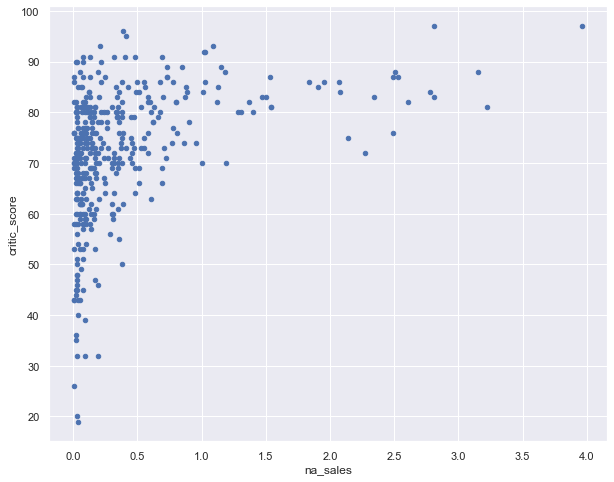

In [87]:
na_critic_score.plot(kind='scatter', x='na_sales', y='critic_score', color='C0');

* игры с малыми оценками критиков **до 50** продаются плохо
* игр с малым **до 40** рейтингом - небольшое количество
* высокие продажи **более 1,5 млн** у игр с **высоким, более 70**, рейтингом
* самые высокие продажи у игр с рейтингом **около и более 80**  

#### ESRB

Заполним пропуски данных по ESRB значением "empty"

In [88]:
# определим табличку na_esrb
na_esrb = na
# заполним пропуски значением "empty"
na_esrb['rating'] = na['rating'].fillna('empty')

Посмотрим продажи в соответсвии с ESRB

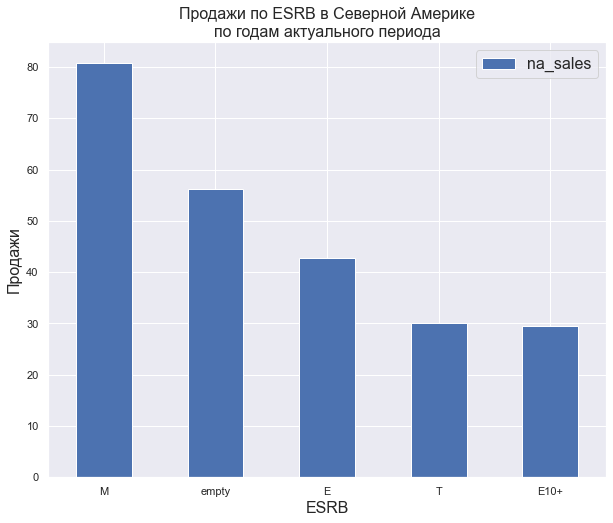

In [89]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
na_esrb.pivot_table(index='rating', values ='na_sales',\
        aggfunc=sum).sort_values(by='na_sales', ascending=False).plot(kind='bar');
plt.legend(fontsize=16);
plt.title('Продажи по ESRB в Северной Америке\nпо годам актуального периода',  fontsize=16)
plt.ylabel("Продажи", fontsize=16);
plt.xlabel("ESRB", fontsize=16);
plt.tick_params(axis='x', labelrotation = 0)
plt.show()

Категория **M** - лидер рынка.

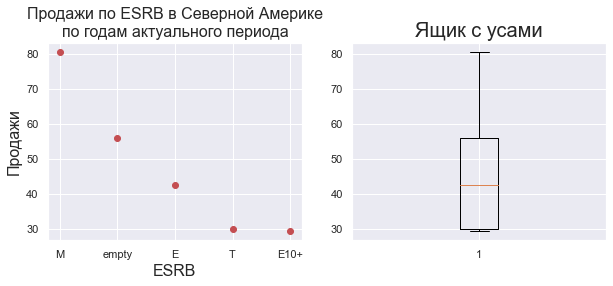

In [90]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
# сводная таблица, отсортированная по суммам
sales_by_rating = na_esrb.pivot_table(index='rating', 
    values ='na_sales', aggfunc=sum).sort_values(by='na_sales', ascending=False)
# графики
# подговка для двух полей графиков
fig=plt.figure()
ax=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
# график слева
ax.plot(sales_by_rating, 'ro');
ax.set_title('Продажи по ESRB в Северной Америке\nпо годам актуального периода',  fontsize=16)
ax.set_ylabel("Продажи", fontsize=16);
ax.set_xlabel("ESRB", fontsize=16);
ax.tick_params(axis='x', labelrotation = 0)
# график справа
ax2.boxplot(sales_by_rating)
ax2.set_title("Ящик с усами",  fontsize=20)

plt.show()

Рейтинг продаж по ESRB  
1. **M**  
2. **без рейтинга** 
3. **E**

#### Вывод по Северной Америке
* **платформы**  
1. PS4
2. XOne  

* **жанры**
1. **Action** и **Shooter**
2. **Spots** 
3. **Role-Playing**  

* **Оценка критиков**  
* * игры с малыми оценками критиков **до 50** продаются плохо
* * игр с малым **до 40** рейтингом - небольшое количество
* * высокие продажи **более 1,5 млн** у игр с **высоким, более 70**, рейтингом
* *  самые высокие продажи у игр с рейтингом **около и более 80**  
 
   
   
* **ESRB**  
* *  Категория M - лидер рынка.  
* *  При этом много продаж игр, которым не присвоен возрастной рейтинг

### Европа

Сформируем табличку данных актуального периода по Европе

In [91]:
# оставим только строки, в которых есть продажи указанного региона
eu = data.query('eu_sales > 0').reset_index(drop=True)
# удалим лишние колонки na_sales, jp_sales, other_sales
eu = eu.drop(['na_sales', 'jp_sales', 'other_sales'], axis=1)
print('Информация по данным:')
print(eu.info())
print('Первые строки:')
display(eu.head())
print('Сводка по численным значениям:')
print(eu.describe())

Информация по данным:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             784 non-null    object 
 1   platform         784 non-null    object 
 2   year_of_release  784 non-null    Int64  
 3   genre            784 non-null    object 
 4   eu_sales         784 non-null    float64
 5   critic_score     436 non-null    float64
 6   user_score       558 non-null    float64
 7   rating           581 non-null    object 
 8   all_sales        784 non-null    float64
dtypes: Int64(1), float64(4), object(4)
memory usage: 56.0+ KB
None
Первые строки:


,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,5.86,NaN,NaN,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,6.31,97.00,8.30,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,3.49,NaN,NaN,NaN,11.68
3,FIFA 16,PS4,2015,Sports,6.12,82.00,4.30,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,3.49,NaN,NaN,NaN,7.98


Сводка по численным значениям:
       year_of_release  eu_sales  critic_score  user_score  all_sales
count           784.00    784.00        436.00      558.00     784.00
mean          2,014.49      0.28         72.26        6.55       0.72
std               0.50      0.60         12.70        1.55       1.38
min           2,014.00      0.01         19.00        1.40       0.01
25%           2,014.00      0.03         66.00        5.70       0.09
50%           2,014.00      0.09         74.00        6.90       0.25
75%           2,015.00      0.26         81.00        7.70       0.68
max           2,015.00      6.31         97.00        9.30      14.63


#### Платформы

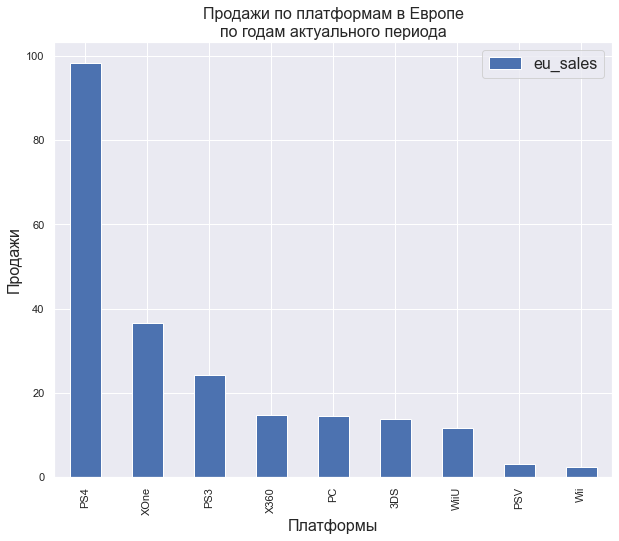

In [92]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
eu.pivot_table(index='platform', values ='eu_sales',\
    aggfunc=sum).sort_values(by='eu_sales', ascending=False).plot(kind='bar');
plt.legend(fontsize=16);
plt.title('Продажи по платформам в Европе\nпо годам актуального периода',  fontsize=16)
plt.ylabel("Продажи", fontsize=16);
plt.xlabel("Платформы", fontsize=16);
plt.show()

Лидеры продаж в Европе по платформам:  
1. PS4
2. XOne
3. PS3 
  

Рейтинг похож на рейтинг глобального рынка  
<a href="#Популярные-платформы" data-toc-modified-id="Популярные-платформы-4.6.3"><span class="toc-item-num">4.6.3&nbsp;&nbsp;</span>Популярные платформы</a>

#### Жанры

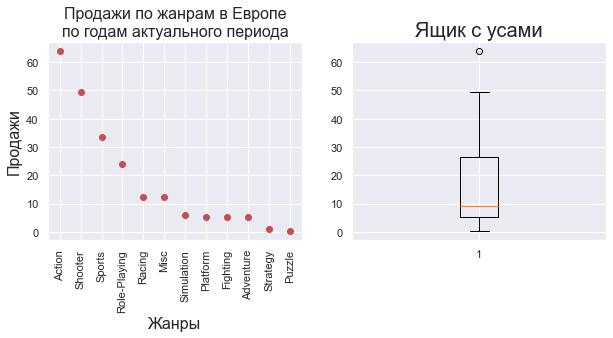

In [93]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
# сводная таблица, отсортированная по суммам
sales_by_genre = eu.pivot_table(index='genre', 
    values ='eu_sales', aggfunc=sum).sort_values(by='eu_sales', ascending=False)
# графики
# подговка для двух полей графиков
fig=plt.figure()
ax=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
# график слева
ax.plot(sales_by_genre, 'ro');
ax.set_title('Продажи по жанрам в Европе\nпо годам актуального периода',  fontsize=16)
ax.set_ylabel("Продажи", fontsize=16);
ax.set_xlabel("Жанры", fontsize=16);
ax.tick_params(axis='x', labelrotation = 90)
# график справа
ax2.boxplot(sales_by_genre)
ax2.set_title("Ящик с усами",  fontsize=20)
plt.show()

1. **Action** 
2. **Shooter**
3. **Sports**
4. **Role-Playing**

Рейтинг жанров в Европе похож на рейтинг жанров на глобальном рынке  
  </span></li><li><span><a href="#Продажи-по-жанрам-за-весь-актуальный-период" data-toc-modified-id="Продажи-по-жанрам-за-весь-актуальный-период-4.8.3"><span class="toc-item-num">4.8.3&nbsp;&nbsp;</span>Продажи по жанрам за весь актуальный период</a>
  
Но имеет более сглаженный вид

#### **critic_score** - зависимость продаж от  оценки критиков

Отсечём NaNы

In [94]:
eu_critic_score = eu.query('critic_score > 0')

Диаграмма рассеяния

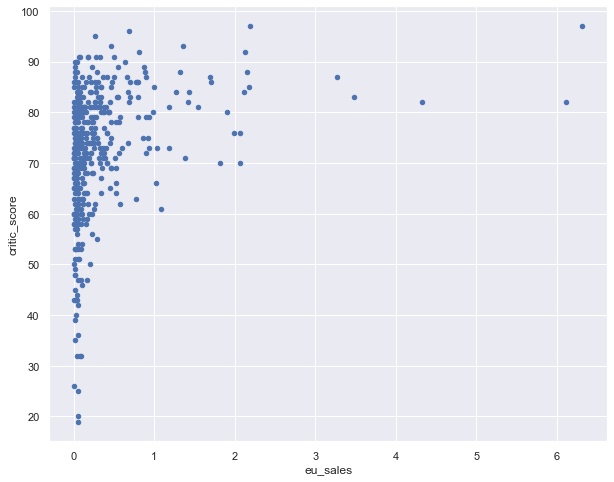

In [95]:
eu_critic_score.plot(kind='scatter', x='eu_sales', y='critic_score', color='C0');

* игры с малыми оценками критиков **до 50** продаются плохо
* игр с малым **до 40** рейтингом - небольшое количество
* высокие продажи **более 3 млн** у игр с **высоким, около и более 80**, рейтингом
* самые высокие продажи у игр с рейтингом **более 80**  

#### ESRB

In [96]:
# определим табличку eu_esrb
eu_esrb = eu
# заполним пропуски значением "empty"
eu_esrb['rating'] = eu['rating'].fillna('empty')

Посмотрим продажи в соответсвии с ESRB

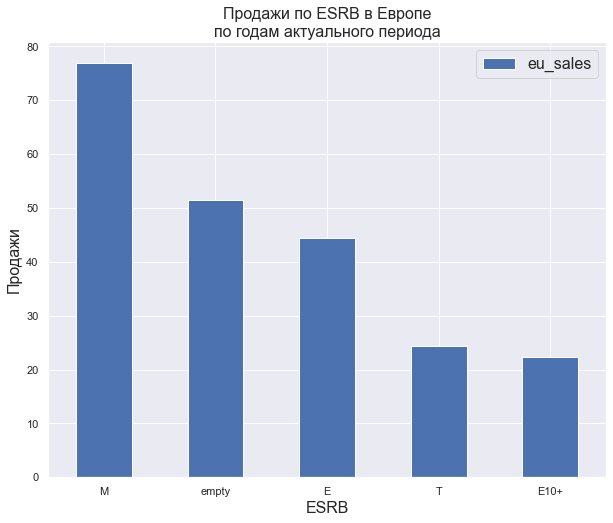

In [97]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
eu_esrb.pivot_table(index='rating', values ='eu_sales',\
        aggfunc=sum).sort_values(by='eu_sales', ascending=False).plot(kind='bar');
plt.legend(fontsize=16);
plt.title('Продажи по ESRB в Европе\nпо годам актуального периода',  fontsize=16)
plt.ylabel("Продажи", fontsize=16);
plt.xlabel("ESRB", fontsize=16);
plt.tick_params(axis='x', labelrotation = 0)
plt.show()

Категория **M** - лидер рынка.

#### Вывод по Европе
* **платформы**
1. PS4
2. XOne
3. PS3  

* **жанры**  
1. **Action** 
2. **Shooter**
3. **Sports**
4. **Role-Playing**  

* **Оценка критиков**  
1. игры с малыми оценками критиков **до 50** продаются плохо
2. игр с малым **до 40** рейтингом - небольшое количество
3. высокие продажи **более 3 млн** у игр с **высоким, около и более 80**, рейтингом
4. самые высокие продажи у игр с рейтингом **более 80**  

* **ESRB**  
1. **M**  
2. без маркировки 


### Япония

Сформируем табличку данных актуального периода по Японии

In [98]:
# оставим только строки, в которых есть продажи указанного региона
jp = data.query('jp_sales > 0').reset_index(drop=True)
# удалим лишние колонки na_sales, eu_sales, other_sales
jp = jp.drop(['na_sales', 'eu_sales', 'other_sales'], axis=1)
print('Информация по данным:')
print(jp.info())
print('Первые строки:')
display(jp.head())
print('Сводка по численным значениям:')
print(jp.describe())

Информация по данным:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             637 non-null    object 
 1   platform         637 non-null    object 
 2   year_of_release  637 non-null    Int64  
 3   genre            637 non-null    object 
 4   jp_sales         637 non-null    float64
 5   critic_score     216 non-null    float64
 6   user_score       258 non-null    float64
 7   rating           266 non-null    object 
 8   all_sales        637 non-null    float64
dtypes: Int64(1), float64(4), object(4)
memory usage: 45.5+ KB
None
Первые строки:


,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,0.36,NaN,NaN,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,0.38,97.00,8.30,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,3.10,NaN,NaN,NaN,11.68
3,FIFA 16,PS4,2015,Sports,0.06,82.00,4.30,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,0.22,NaN,NaN,NaN,7.98


Сводка по численным значениям:
       year_of_release  jp_sales  critic_score  user_score  all_sales
count           637.00    637.00        216.00      258.00     637.00
mean          2,014.52      0.12         74.24        7.20       0.62
std               0.50      0.31          9.51        1.23       1.47
min           2,014.00      0.01         45.00        3.10       0.01
25%           2,014.00      0.02         68.00        6.60       0.03
50%           2,015.00      0.05         74.00        7.50       0.11
75%           2,015.00      0.10         82.00        8.10       0.46
max           2,015.00      3.18         97.00        9.30      14.63


#### Платформы

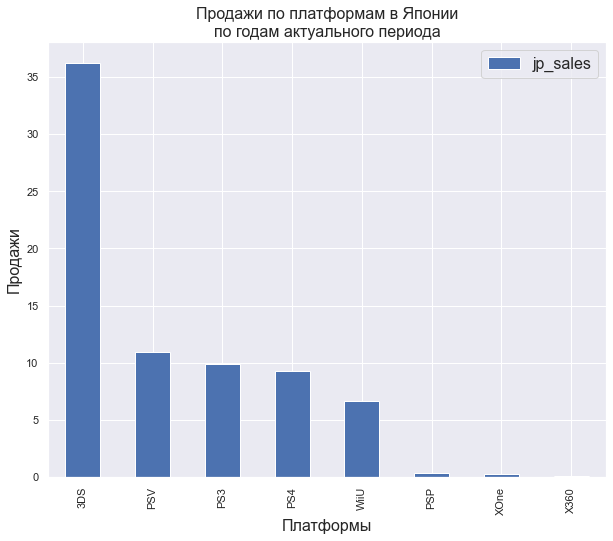

In [100]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
jp.pivot_table(index='platform', values ='jp_sales',\
        aggfunc=sum).sort_values(by='jp_sales', ascending=False).plot(kind='bar');
plt.legend(fontsize=16);
plt.title('Продажи по платформам в Японии\nпо годам актуального периода',  fontsize=16)
plt.ylabel("Продажи", fontsize=16);
plt.xlabel("Платформы", fontsize=16);
plt.show()

Лидеры продаж в Японии по платформам:  
1. 3DS
 
Середнечки:
1. PSV 
2. PS3
3. PS4  
Рынок Японии **сильно отличается** от северо-американского и европейкого

#### Жанры

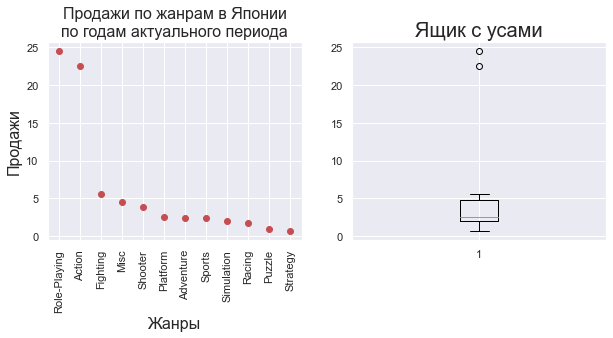

In [102]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
# сводная таблица, отсортированная по суммам
sales_by_genre = jp.pivot_table(index='genre', 
    values ='jp_sales', aggfunc=sum).sort_values(by='jp_sales', ascending=False)
# графики
# подговка для двух полей графиков
fig=plt.figure()
ax=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
# график слева
ax.plot(sales_by_genre, 'ro');
ax.set_title('Продажи по жанрам в Японии\nпо годам актуального периода',  fontsize=16)
ax.set_ylabel("Продажи", fontsize=16);
ax.set_xlabel("Жанры", fontsize=16);
ax.tick_params(axis='x', labelrotation = 90)
# график справа
ax2.boxplot(sales_by_genre)
ax2.set_title("Ящик с усами",  fontsize=20)
plt.show()

Япония - **отдельный мир** на нашей планете.  
Лидер японского рынка - **ролевые игры**  
А затем - с существенным отрывом - как в остальном мире

#### **critic_score** - зависимость продаж от  оценки критиков

Отсечём NaNы

In [103]:
jp_critic_score = jp.query('critic_score > 0')

Диаграмма рассеяния

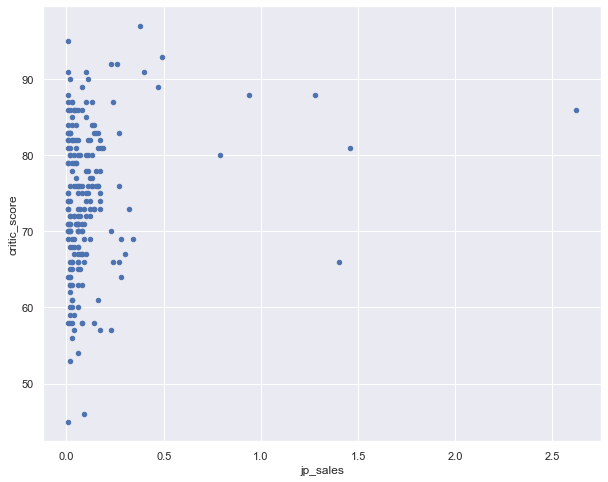

In [104]:
jp_critic_score.plot(kind='scatter', x='jp_sales', y='critic_score', color='C0');

В Японии **сильная** взаимосвязь между оценками критиков и продажами.  
Видимо, в стране восходящего солнца высок авторитет мнения старшего товарища


#### ESRB

In [105]:
# определим табличку eu_esrb
jp_esrb = jp
# заполним пропуски значением "empty"
jp_esrb['rating'] = jp['rating'].fillna('empty')


Посмотрим продажи в соответсвии с ESRB

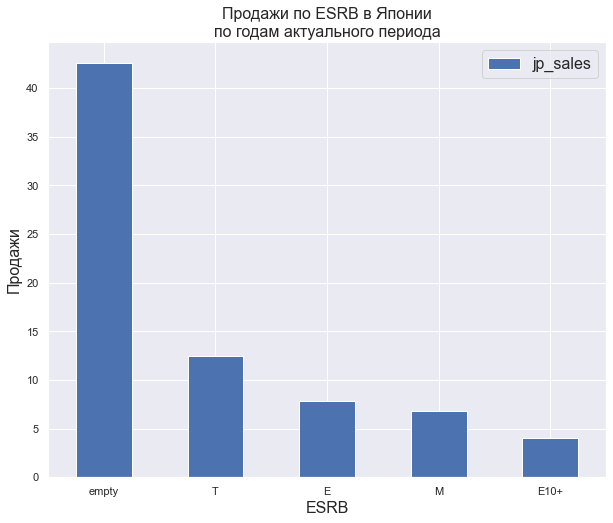

In [106]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
jp_esrb.pivot_table(index='rating', values ='jp_sales',\
        aggfunc=sum).sort_values(by='jp_sales', ascending=False).plot(kind='bar');
plt.legend(fontsize=16);
plt.title('Продажи по ESRB в Японии\nпо годам актуального периода',  fontsize=16)
plt.ylabel("Продажи", fontsize=16);
plt.xlabel("ESRB", fontsize=16);
plt.tick_params(axis='x', labelrotation = 0)
plt.show()

В Японии - **как во всём мире**!  

Рейтинг продаж по ESRB  
1. без маркировки
2. **T**, **E** и **M** 
3. **E10+**

#### Вывод по Японии
* **платформы**
Лидеры продаж в Японии по платформам:  
1. 3DS
 
Середнечки:
1. PSV 
2. PS3
3. PS4 

* **жанры**  
Япония - **отдельный мир** на нашей планете.  
Лидер японского рынка - **ролевые игры**  
А затем - с существенным отрывом - как в остальном мире   

* **Оценка критиков**  
В Японии **сильная** взаимосвязь между оценками критиков и продажами.  
Видимо, в стране восходящего солнца высок авторитет мнения старшего товарища
 

* **ESRB**  
1. без маркировки
2. **T**, **E** и **M** 
3. **E10+**

### Другие регионы

Сформируем табличку данных актуального периода по Другим регионам

In [107]:
# оставим только строки, в которых есть продажи указанного региона
other = data.query('other_sales > 0').reset_index(drop=True)
# удалим лишние колонки na_sales, eu_sales, jp_sales
other = other.drop(['na_sales', 'eu_sales', 'jp_sales'], axis=1)
print('Информация по данным:')
print(other.info())
print('Первые строки:')
display(other.head())
print('Сводка по численным значениям:')
print(other.describe())

Информация по данным:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             697 non-null    object 
 1   platform         697 non-null    object 
 2   year_of_release  697 non-null    Int64  
 3   genre            697 non-null    object 
 4   other_sales      697 non-null    float64
 5   critic_score     394 non-null    float64
 6   user_score       510 non-null    float64
 7   rating           520 non-null    object 
 8   all_sales        697 non-null    float64
dtypes: Int64(1), float64(4), object(4)
memory usage: 49.8+ KB
None
Первые строки:


,name,platform,year_of_release,genre,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,2.38,NaN,NaN,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,1.97,97.00,8.30,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,0.74,NaN,NaN,NaN,11.68
3,FIFA 16,PS4,2015,Sports,1.28,82.00,4.30,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,1.28,NaN,NaN,NaN,7.98


Сводка по численным значениям:
       year_of_release  other_sales  critic_score  user_score  all_sales
count           697.00       697.00        394.00      510.00     697.00
mean          2,014.47         0.10         72.96        6.57       0.81
std               0.50         0.20         12.23        1.55       1.44
min           2,014.00         0.01         19.00        1.50       0.03
25%           2,014.00         0.01         67.00        5.70       0.13
50%           2,014.00         0.03         74.50        6.90       0.32
75%           2,015.00         0.09         81.00        7.70       0.75
max           2,015.00         2.38         97.00        9.30      14.63


#### Платформы

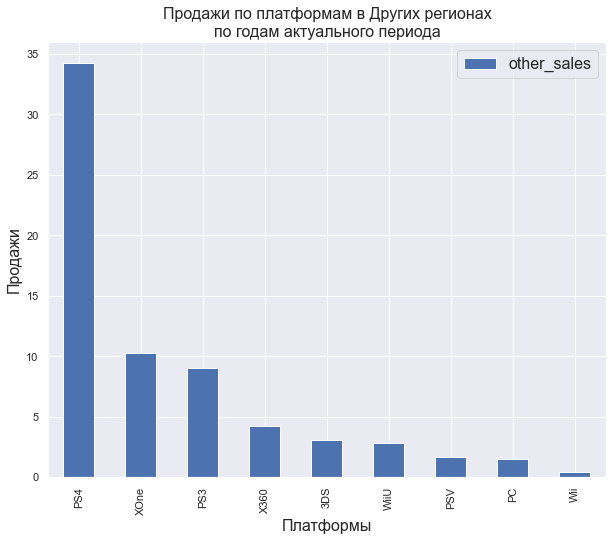

In [108]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
other.pivot_table(index='platform', values ='other_sales',\
    aggfunc=sum).sort_values(by='other_sales', ascending=False).plot(kind='bar');
plt.legend(fontsize=16);
plt.title('Продажи по платформам в Других регионах\nпо годам актуального периода',  fontsize=16)
plt.ylabel("Продажи", fontsize=16);
plt.xlabel("Платформы", fontsize=16);
plt.show()

Лидеры продаж в Других регионах по платформам:  
1. PS4
  
Середнечки:
1. XOne
2. PS3
3. X360


#### Жанры

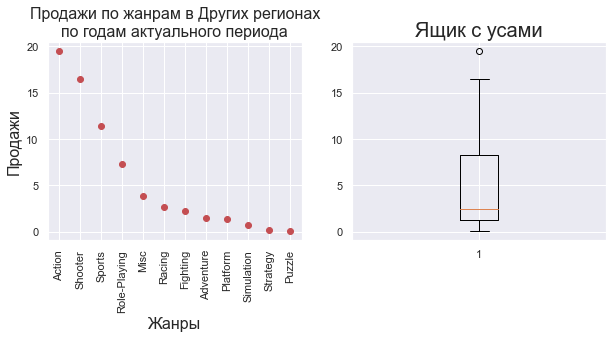

In [109]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
# сводная таблица, отсортированная по суммам
sales_by_genre = other.pivot_table(index='genre', 
    values ='other_sales', aggfunc=sum).sort_values(by='other_sales', ascending=False)
# графики
# подговка для двух полей графиков
fig=plt.figure()
ax=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
# график слева
ax.plot(sales_by_genre, 'ro');
ax.set_title('Продажи по жанрам в Других регионах\nпо годам актуального периода',  fontsize=16)
ax.set_ylabel("Продажи", fontsize=16);
ax.set_xlabel("Жанры", fontsize=16);
ax.tick_params(axis='x', labelrotation = 90)
# график справа
ax2.boxplot(sales_by_genre)
ax2.set_title("Ящик с усами",  fontsize=20)
plt.show()

Рейтинг жанров в Других регионах похож на рейтинг жанров на глобальном рынке  
  </span></li><li><span><a href="#Продажи-по-жанрам-за-весь-актуальный-период" data-toc-modified-id="Продажи-по-жанрам-за-весь-актуальный-период-4.8.3"><span class="toc-item-num">4.8.3&nbsp;&nbsp;</span>Продажи по жанрам за весь актуальный период</a>
  
Но имеет более сглаженный вид

#### **critic_score** - зависимость продаж от  оценки критиков

Отсечём NaNы

In [110]:
other_critic_score = other.query('critic_score > 0')

Диаграмма рассеяния

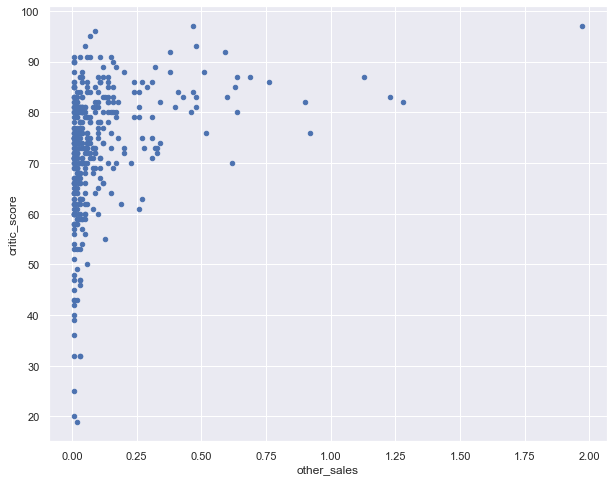

In [111]:
other_critic_score.plot(kind='scatter', x='other_sales', y='critic_score', color='C0');

* игры с малым пользовательским рейтингом **до 60** продаются плохо
* игр с малым **до 40** рейтингом - небольшое количество
* высокие продажи **более 2 млн** у игр с **высоким, около и более 60**, рейтингом
* самые высокие продажи у игр с рейтингом **около и более 90**  

Картина очень схожая с глобальными продажами  
</span></li><li><span><a href="#По-диаграмме-в-целом:" data-toc-modified-id="По-диаграмме-в-целом:-4.7.2.2"><span class="toc-item-num">4.7.2.2&nbsp;&nbsp;</span>По диаграмме в целом:</a>

#### ESRB

In [112]:
# определим табличку na_esrb
other_esrb = other
# заполним пропуски значением "empty"
other_esrb['rating'] = other['rating'].fillna('empty')

Посмотрим продажи в соответсвии с ESRB

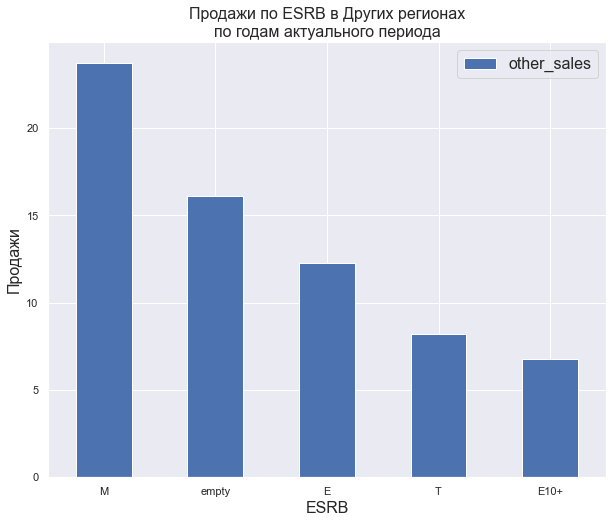

In [113]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
other_esrb.pivot_table(index='rating', values ='other_sales',\
        aggfunc=sum).sort_values(by='other_sales', ascending=False).plot(kind='bar');
plt.legend(fontsize=16);
plt.title('Продажи по ESRB в Других регионах\nпо годам актуального периода',  fontsize=16)
plt.ylabel("Продажи", fontsize=16);
plt.xlabel("ESRB", fontsize=16);
plt.tick_params(axis='x', labelrotation = 0)
plt.show()

Категория **M** - лидер рынка.  
И очень много "без маркировки"

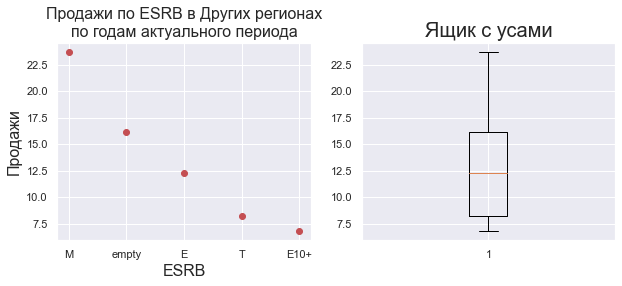

In [114]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
# сводная таблица, отсортированная по суммам
sales_by_rating = other_esrb.pivot_table(index='rating', 
    values ='other_sales', aggfunc=sum).sort_values(by='other_sales', ascending=False)
# графики
# подговка для двух полей графиков
fig=plt.figure()
ax=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
# график слева
ax.plot(sales_by_rating, 'ro');
ax.set_title('Продажи по ESRB в Других регионах\nпо годам актуального периода',  fontsize=16)
ax.set_ylabel("Продажи", fontsize=16);
ax.set_xlabel("ESRB", fontsize=16);
ax.tick_params(axis='x', labelrotation = 0)
# график справа
ax2.boxplot(sales_by_rating)
ax2.set_title("Ящик с усами",  fontsize=20)

plt.show()

Рейтинг продаж по ESRB  
1. **M**  
2. **без маркировки** 
3. **E**

#### Вывод по Другим регионам
* **платформы**  
1. PS4
  
Середнечки:
1. XOne
2. PS3
3. X360

* **жанры**  
* * Рейтинг жанров в Других регионах похож на рейтинг жанров на глобальном рынке  
  
  
* **Оценка критиков**  
* * Влияние оценки критиков столь же велико, как и на глобальном рынке
  
  
* **ESRB**  
Категория **M** - лидер рынка.  
И очень много "без маркировки"

### Вывод по портретам пользователей

Пользователи по решионам **различаются**  
Для прогнозирования успешной политики в сфере продаж следует детально рассматривать характеристики региона, на котором планируется деятельность магазина.

## Гипотезы  
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  

* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковы

Данные берём в глобальном разрезе.  
За актуальный период.  
**нулевая гипотеза**  
- средние пользовательские рейтинги платформ Xbox One и PC **одинаковы**
**альтернативная гипотеза**  
- средние пользовательские рейтинги платформ Xbox One и PC **различаются**  
  
  гипотеза **двусторонняя**

Глобальные данные актуального периода находятся в таблице **data**

Отберём данные только по платформам **Xbox One и PC**

In [130]:
data_x_pc = data.query('platform == "XOne" or platform == "PC"')

In [131]:
data_x_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.00,7.90,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.00,5.40,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.00,6.40,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.00,6.20,M,4.22


In [132]:
data_x_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 99 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             238 non-null    object 
 1   platform         238 non-null    object 
 2   year_of_release  238 non-null    Int64  
 3   genre            238 non-null    object 
 4   na_sales         238 non-null    float64
 5   eu_sales         238 non-null    float64
 6   jp_sales         238 non-null    float64
 7   other_sales      238 non-null    float64
 8   critic_score     166 non-null    float64
 9   user_score       176 non-null    float64
 10  rating           171 non-null    object 
 11  all_sales        238 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 24.4+ KB


Избавимся от строк с пропусками значений в **user_score**

In [133]:
data_x_pc = data_x_pc.dropna(axis=0, subset=['user_score'])
data_x_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 165 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             176 non-null    object 
 1   platform         176 non-null    object 
 2   year_of_release  176 non-null    Int64  
 3   genre            176 non-null    object 
 4   na_sales         176 non-null    float64
 5   eu_sales         176 non-null    float64
 6   jp_sales         176 non-null    float64
 7   other_sales      176 non-null    float64
 8   critic_score     163 non-null    float64
 9   user_score       176 non-null    float64
 10  rating           168 non-null    object 
 11  all_sales        176 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 18.0+ KB


Средние пользовательские рейтинги XOne:

In [134]:
data_x_pc.query('platform == "XOne"').user_score.describe()

count   99.00
mean     6.59
std      1.26
min      2.10
25%      5.80
50%      6.80
75%      7.50
max      9.20
Name: user_score, dtype: float64

Средние пользовательские рейтинги PC:

In [135]:
data_x_pc.query('platform == "PC"').user_score.describe()

count   77.00
mean     6.30
std      1.69
min      1.40
25%      5.40
50%      6.80
75%      7.60
max      9.30
Name: user_score, dtype: float64

Cредние пользовательские рейтинги платформ Xbox One и PC **различаются**  
6.59 для Xbox One  
6.30 для PC

**Проверим это утверждение статистически**

1. посмотрим на распределения данных

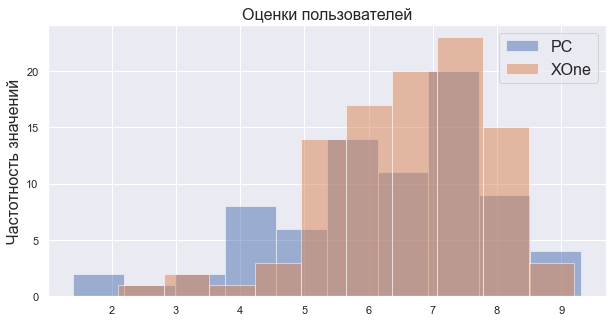

In [136]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,5)})

# plot
ax = data_x_pc.query('platform == "PC"').user_score.plot(kind='hist',label='PC', legend=True, alpha=0.5);
data_x_pc.query('platform == "XOne"').user_score.plot(kind='hist',label='XOne', legend=True, alpha=0.5);

plt.legend(fontsize=16);
plt.title("Оценки пользователей",  fontsize=16)
plt.ylabel("Частотность значений", fontsize=16);

Распределение оценок XOne **нормальное**  
А PC **скошенное**  

Посмотрим на количество данных.

77 значений для PC  
 
99 значений для XOne  
 
 **большое количество значений в выборке данных позволяеят применить метод статистической проверки гипотезы**

In [137]:
alpha = .05
results = st.ttest_ind(
    data_x_pc.query('platform == "PC"')['user_score'], 
    data_x_pc.query('platform == "XOne"')['user_score'])
print('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    print("Гипотеза о равенстве средних оценок пользователей у платформ XOne и PC не верна")
else:
    print("Гипотеза о равенстве средних оценок пользователей у платформ XOne и PC верна")


p-значение:  0.189967321660691
Гипотеза о равенстве средних оценок пользователей у платформ XOne и PC верна


#### статистически есть основания полагать, что средние равны
Cредние пользовательские рейтинги платформ Xbox One и PC **одинаковы**  
несмотря на то,что цифры средних различаются
6.59 для Xbox One  
6.30 для PC

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Данные берём в глобальном разрезе.  
За актуальный период.  
**нулевая гипотеза**  
- средние пользовательские рейтинги жанров Action и Sports  **одинаковы**
**альтернативная гипотеза**  
- средние пользовательские рейтинги жанров Action и Sports  **различаются**  
  
  гипотеза **двусторонняя**

Глобальные данные актуального периода находятся в таблице **data**

Отберём данные только жанров Action и Sports

In [138]:
data_a_s = data.query('genre == "Action" or genre == "Sports"')
data_a_s.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.00,5.70,E,6.08
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.00,7.90,M,5.47
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,NaN,NaN,NaN,4.72


In [129]:
data_a_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 42 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             554 non-null    object 
 1   platform         554 non-null    object 
 2   year_of_release  554 non-null    Int64  
 3   genre            554 non-null    object 
 4   na_sales         554 non-null    float64
 5   eu_sales         554 non-null    float64
 6   jp_sales         554 non-null    float64
 7   other_sales      554 non-null    float64
 8   critic_score     220 non-null    float64
 9   user_score       302 non-null    float64
 10  rating           329 non-null    object 
 11  all_sales        554 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 56.8+ KB


Избавимся от строк с пропусками значений в **user_score**

In [139]:
data_a_s = data_a_s.dropna(axis=0, subset=['user_score'])
data_a_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 42 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             302 non-null    object 
 1   platform         302 non-null    object 
 2   year_of_release  302 non-null    Int64  
 3   genre            302 non-null    object 
 4   na_sales         302 non-null    float64
 5   eu_sales         302 non-null    float64
 6   jp_sales         302 non-null    float64
 7   other_sales      302 non-null    float64
 8   critic_score     215 non-null    float64
 9   user_score       302 non-null    float64
 10  rating           294 non-null    object 
 11  all_sales        302 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 31.0+ KB


Средние пользовательские рейтинги Action:

In [140]:
data_a_s.query('genre == "Action"').user_score.describe()

count   212.00
mean      6.81
std       1.34
min       2.40
25%       6.30
50%       7.10
75%       7.70
max       9.00
Name: user_score, dtype: float64

Средние пользовательские рейтинги Sports:

In [141]:
data_a_s.query('genre == "Sports"').user_score.describe()

count   90.00
mean     5.14
std      1.78
min      1.40
25%      3.65
50%      5.40
75%      6.38
max      8.80
Name: user_score, dtype: float64

Cредние пользовательские рейтинги жанров Action и Sports  

6.81 для Action  
5.14 для Sports  

Различие **существенно**  

Проверим это статистически

посмотрим на распределения данных

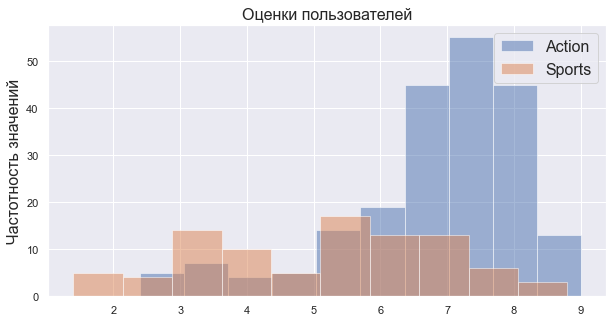

In [142]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,5)})

# plot
ax = data_a_s.query('genre == "Action"').user_score.plot(kind='hist',label='Action', legend=True, alpha=0.5);
data_a_s.query('genre == "Sports"').user_score.plot(kind='hist',label='Sports', legend=True, alpha=0.5);

plt.legend(fontsize=16);
plt.title("Оценки пользователей",  fontsize=16)
plt.ylabel("Частотность значений", fontsize=16);

Распределения не похожи друг на друга.  

Количество данных в выборках более 90 строк.  

**Можно примерить статистический метод проверки гипотезы**

In [145]:
alpha = .05
results = st.ttest_ind(
    data_a_s.query('genre == "Action"')['user_score'], 
    data_a_s.query('genre == "Sports"')['user_score'])
print('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    print("Гипотеза о равенстве средних оценок пользователей в жанрах Action и Sports не верна")
else:
    print("Гипотеза о равенстве средних оценок пользователей в жанрах Action и Sports верна")


p-значение:  3.947299100723211e-17
Гипотеза о равенстве средних оценок пользователей в жанрах Action и Sports не верна


#### статистически есть основания полагать, что средние НЕ равны
Cредние пользовательские рейтинги в жанрах Action и Sports **различаются**  

6.81 для Action
5.14 для Sports

## Общий вывод

### Запрос бизнеса
**Выявить определяющие успешность игры закономерности.**

#### Перспективные платформы
На глобальном рынке
* PS4
* XOne  
Это молодые платформы, являющиеся новым воплощением главных игроков игровой индустрии.

#### Жанры  
На глобальном рынке  
1. Shooter  
2. Sports  
3. Platform

#### Оценка критиков  
1. оценка более 80 баллов - перспектива больших объёмов продаж игры  
2. оценка более 70 баллов - перспектива надёжных объёмов продаж выше среднего

#### Регональные особенности
И платформенные и жанровые предпочтения различаются по регионам  
Особенно отличаются предпочтения пользователей Японии  

(рынок Китая в исследовании не выделялся из "других регионов")

## Дайджест исследования

### Сводка по данным

Данные без явных дубликатов  
  
Неявные дубликаты также отсутствуют  
      
Пара строк была без названий игр. Эти строки далили из данных.  
          
**Самая часто упоминаемая игра Need for Speed: Most Wanted**  
                  
Год выпуска игры - 269 порпусков.  
Оставили без заполнения.  

Тип значений в колонке "Год выпуска" переведён в целочисленный.  
                        
Самый часто упоминаемый **жанр** - Action  
                          
                            
В колонке "пользовательская оценка" есть значение "tbd".  
Это означает "не определён".  
Заменили на NaN.  
                              
В этой колонке много пропусков значений. Оставили как есть, без заполнения.  
                                
Рейтинг ESRB.  
Есть много пропусков значений.  
Заполнили значением "empty".  
  


### Суммарные продажи 
Добавили колонку all_sales с продажами во всех регионах для каждой строки.  

all_sales = na_sales + eu_sales + jp_sales + other_sales  
  


### Актуальный период 
По совмещённому графику количества игр и суммарных продаж:

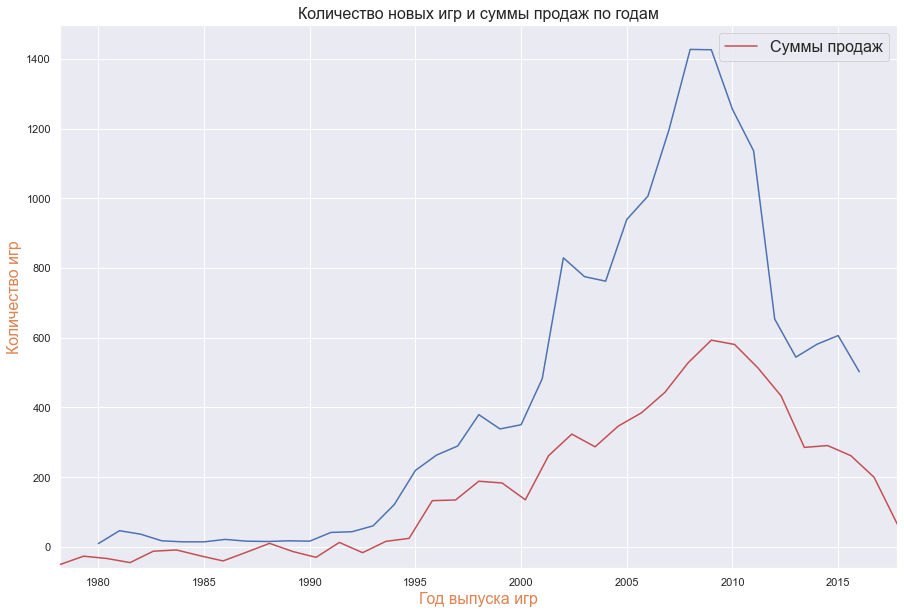

In [160]:
# setup size plot
sns.set(rc = {'figure.figsize':(15,10)})
fig=plt.figure()

ax=fig.add_subplot(111, label="1")
ax3=fig.add_subplot(111, frame_on=False, alpha=0.7)
# plot qty_games_per_year
ax.plot(games.groupby(by='year_of_release')['name'].count(), color="C0", label="Games")
ax.set_xlabel("Год выпуска игр", color="C1",  fontsize=16)
ax.set_ylabel("Количество игр", color="C1",  fontsize=16)

# plot qty_sales_per_year
ax3.plot(games.groupby(by='year_of_release')['all_sales'].sum(), color="C3", label="Суммы продаж")
ax3.axis('off')

plt.title("Количество новых игр и суммы продаж по годам",  fontsize=16);
plt.legend(  fontsize=16)
plt.ylim(0, 1600)
plt.xlim(1980, 2016)
plt.show()

Выбрали **2014 - 2015** наш интервал для исследования

### Платформы - лидеры по продажам 

In [161]:
sales_up_600

platform
PS2    1,255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: all_sales, dtype: float64

### Срок жизни платформ

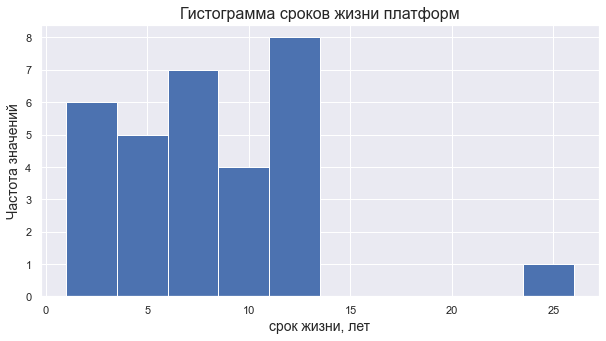

In [162]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,5)})
plt.rcParams.update({'font.size': 14})

platform_lifetime.lifetime.hist(bins=10);

plt.ylabel("Частота значений",  fontsize=14);
plt.title("Гистограмма сроков жизни платформ",  fontsize=16);
plt.xlabel("срок жизни, лет",  fontsize=14);

Уникальный рекордсмен - РС
Однако, нельзя считать однородной эту пратформу.
В платформе РС есть большое число поколений центральных процессоров и графических ускорителей.
Поэтому для того, чтобы эту платформу полноценно включить в исследование, необходимо её дробить на группы
Такой возможности у нас нет, поэтому в вопросах, связанных со сроками жизни платформ, данные по РС исключаем

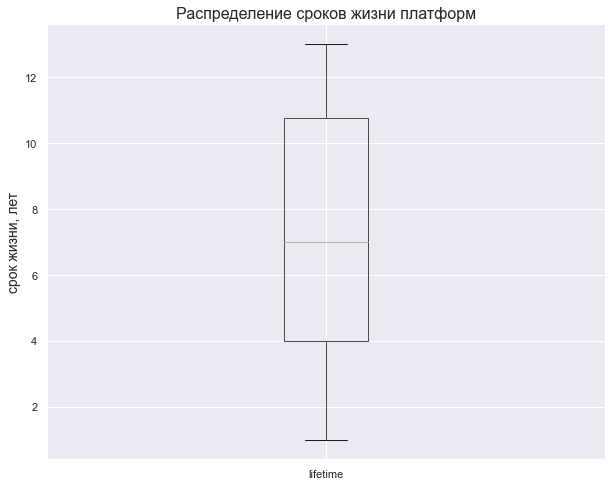

In [163]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 14})

platform_lifetime.query('platform != "PC"').boxplot('lifetime');

plt.ylabel("срок жизни, лет",  fontsize=14);
plt.title("Распределение сроков жизни платформ",  fontsize=16);

**7 лет** - медианное значение

### Год пика разнообразия игровой индустрии

In [164]:
platform_lifetime.first_year.describe()

count      31.00
mean    1,997.65
std         9.09
min     1,980.00
25%     1,992.50
50%     1,996.00
75%     2,004.50
max     2,013.00
Name: first_year, dtype: float64

**2013** - год технрологического прорыва в игровой индустрии  

В этом году самый богатый урожай новых игровых платформ и новых поколений лидеров рынка

### Года максимального разнообразия игр

Количество игр по годам выпуска


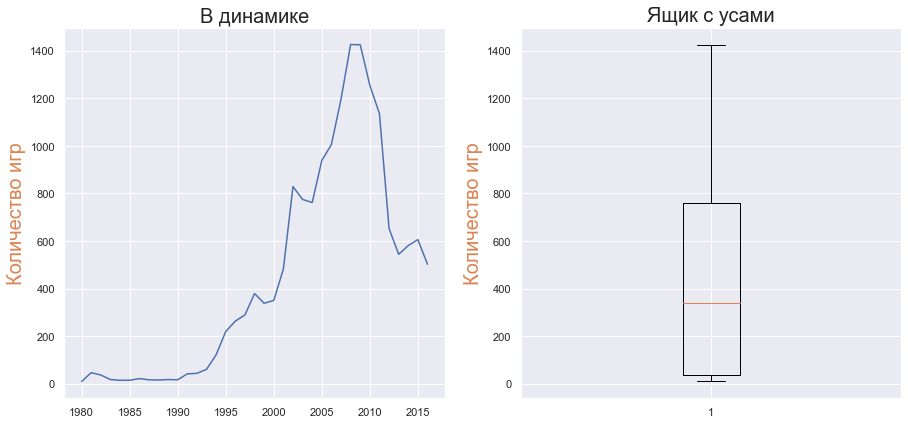

In [165]:
print('Количество игр по годам выпуска')
# setup size plot
sns.set(rc = {'figure.figsize':(15,15)})
fig=plt.figure()
 
ax=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
# plot line graph
ax.plot(qty_games_per_year)
ax.set_ylabel("Количество игр", color="C1",  fontsize=20)
ax.set_title("В динамике",  fontsize=20)
 
# plot box
ax2.boxplot(qty_games_per_year)
ax2.set_ylabel("Количество игр", color="C1",  fontsize=20)
ax2.set_title("Ящик с усами",  fontsize=20)
 
plt.show()

**2008 - 2010** годы игроманского счастья
* 2008 - 1457 игр
* 2009 - 1476 игр
* 2010 - 1302 игры

### Динамика продаж по платформам

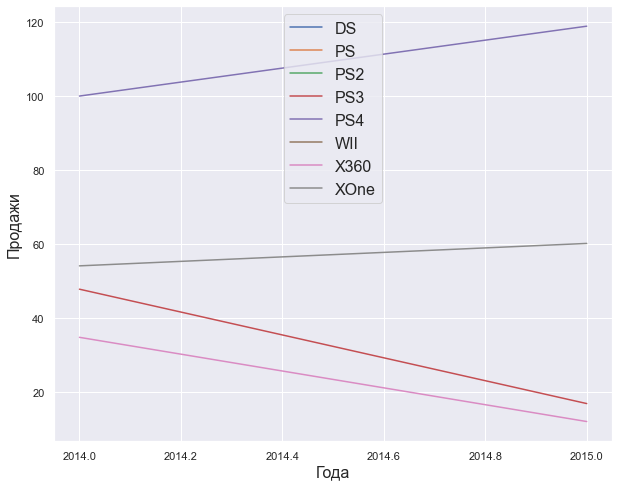

In [166]:
# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 14})
platforms = ['DS', 'PS', 'PS2', 'PS3', 'PS4', 'WII', 'X360', 'XOne']

for platf in platforms:
    # dataframe for plot
    local_query = sales_by_platform.query('platform == @platf')
    # графики
    plt.plot(local_query['year_of_release'], local_query['all_sales'], label=platf);
    
    plt.legend(fontsize=16);
    plt.ylabel("Продажи", fontsize=16);
    plt.xlabel("Года", fontsize=16);

Продажи растут лишь у
* PS4
* XOne

### Влияние оценок пользователей на продажи

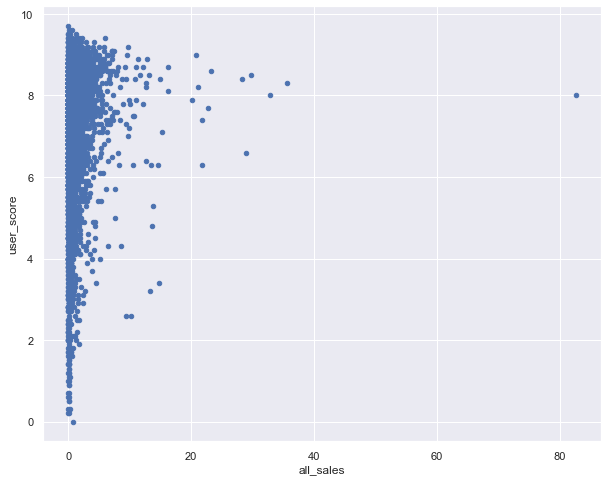

In [169]:
games.plot(kind='scatter', x='all_sales', y='user_score', color='C0');

##### По диаграмме в целом:
* игры с малым пользовательским рейтингом **до 3х** продаются плохо
* игр с малым **до 3х** рейтингом - небольшое количество
* высокие продажи **более 15 млн** у игр с **высоким, более 6-ти**, рейтингом
* самые высокие продажи у игр с рейтингом **более 8-ми**

### Влияние оценок критиков на продажи

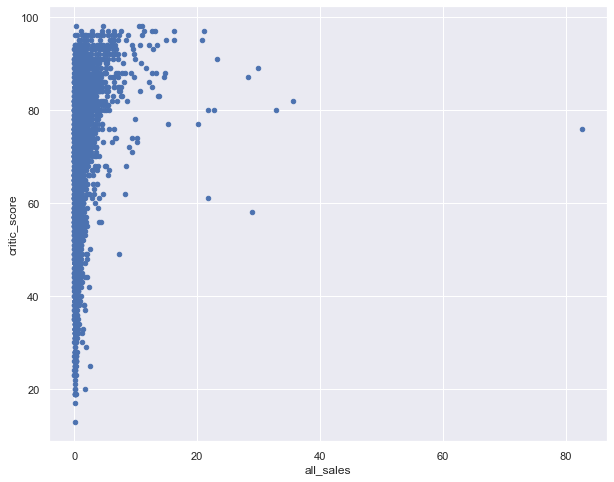

In [170]:
games.plot(kind='scatter', x='all_sales', y='critic_score', color='C0');

##### По диаграмме в целом:
* игры с малым пользовательским рейтингом **до 60** продаются плохо
* игр с малым **до 40** рейтингом - небольшое количество
* высокие продажи **более 15 млн** у игр с **высоким, более 75**, рейтингом
* самые высокие продажи у игр с рейтингом **более 90**  

**Диаграмма зависимости продаж от оценки критиков имеет более выраженный характер, чем от оценки пользователей**

### ESRB

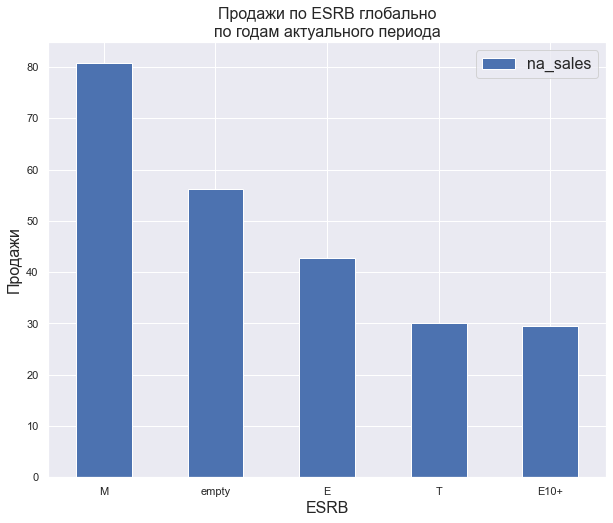

In [171]:
# определим табличку na_esrb
esrb = data
# заполним пропуски значением "empty"
esrb['rating'] = esrb['rating'].fillna('empty')

# setup size plot
sns.set(rc = {'figure.figsize':(10,8)})
plt.rcParams.update({'font.size': 16})
esrb.pivot_table(index='rating', values ='na_sales',\
        aggfunc=sum).sort_values(by='na_sales', ascending=False).plot(kind='bar');
plt.legend(fontsize=16);
plt.title('Продажи по ESRB глобально\nпо годам актуального периода',  fontsize=16)
plt.ylabel("Продажи", fontsize=16);
plt.xlabel("ESRB", fontsize=16);
plt.tick_params(axis='x', labelrotation = 0)
plt.show()

Категория **M** - лидер рынка.  
Огромное количество игр без возрастной маркировки.

### Жанры и продажи

Рейтинг жанров
genre
Shooter        0.68
Sports         0.36
Platform       0.25
Misc           0.17
Racing         0.17
Simulation     0.16
Fighting       0.13
Action         0.11
Role-Playing   0.11
Strategy       0.06
Puzzle         0.05
Adventure      0.04
Name: all_sales, dtype: float64


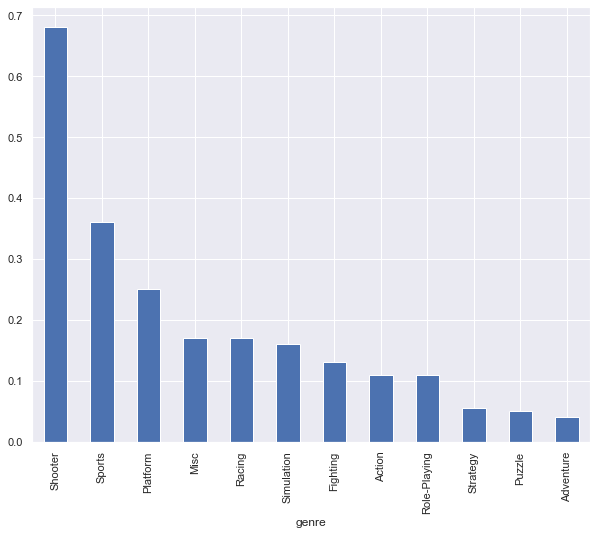

In [174]:
# медианы
data.groupby(by='genre', dropna=True)['all_sales'].median().\
    sort_values(ascending=False).plot(kind='bar');
print("Рейтинг жанров")
print(data.groupby(by='genre', dropna=True)['all_sales'].median().\
      sort_values(ascending=False))

1. Хитовость и хайповость конкретной игры - основной фактор высоких продаж в целом
2. **Shooter** - жанр игр, взобравшийся на вершину популярности с невообразимым отрывом от других жанров
3. **Sports** и **Platform** - следуют за Action с существенным отрывом.
4. **Крепкие середнячки** - Simulation, Racing, Misc  .... 


### Портрет пользователя по регионам
Пользовательское поведение по регионам различается.  
  
  Особенно выделяется регион **Япония**

### Гипотезы 
#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
**нулевая гипотеза**

средние пользовательские рейтинги платформ Xbox One и PC одинаковы

**альтернативная гипотеза**

средние пользовательские рейтинги платформ Xbox One и PC различаются

гипотеза двусторонняя

6.59 для Xbox One  

6.30 для PC  
  
**статистически есть основания полагать, что средние равны**


#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 
**нулевая гипотеза**  
  
средние пользовательские рейтинги жанров Action и Sports одинаковы  
  
**альтернативная гипотеза**  
  
средние пользовательские рейтинги жанров Action и Sports различаются  
  
гипотеза двусторонняя  
    
6.81 для Action  

5.14 для Sports  

**статистически есть основания полагать, что средние НЕ равны**

автор исследования Эдуард Дементьев